In [1]:
%load_ext autoreload
%load_ext notexbook
%autoreload 2
%load_ext autotime

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import glob
import seaborn as sns
import sys
sys.path.append("..")
from tqdm import tqdm
import networkx as nx

plt.style.use("../config/custom_plt.mplstyle")

colors = [
    "#7494d3",
    "#5cb545",
    "#9956c6",
    "#a7b338",
    "#6a6bc6",
    "#d09e40",
    "#ce62bb",
    "#56be85",
    "#d1477d",
    "#397f4d",
    "#cf4b4a",
    "#40bbc1",
    "#d8662c",
    "#99af66",
    "#b76989",
    "#6d7127",
    "#b6744a"
]

time: 1.59 s (started: 2022-12-21 10:49:38 +01:00)


In [2]:
%texify --code-font-family Monaco --linespread 1.2 --code-font-size 13

time: 54.7 ms (started: 2022-12-21 10:49:45 +01:00)


In [3]:
df_homophily = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/homophily_datasets_new.csv")

time: 36.8 ms (started: 2022-12-21 10:49:47 +01:00)


In [4]:
# df_features = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/feature_importance_datasets.csv")

time: 333 µs (started: 2022-12-21 10:49:49 +01:00)


In [5]:
# df_all = df_homophily.merge(df_features)
df_all = df_homophily
df_all

,dataset,H_node,H_edge
0,citeseer,0.714119,0.736369
1,cora,0.814498,0.804103
2,film,0.221966,0.219460
3,dblp,0.734636,0.744707
4,imdb,0.462170,0.446323
5,acm,0.863966,0.815885
6,amazon_photo,0.848826,0.827205
7,cornell,0.118240,0.132143
8,wisconsin,0.170690,0.206009
9,texas,0.087281,0.111864


time: 9.98 ms (started: 2022-12-21 10:49:50 +01:00)


- 1  --  citeseer
- 2  --  cora
- 3  --  film
- 4  --  dblp
- 5  --  imdb
- 6  --  acm
- 7  --  amazon_photo
- 8  --  cornell
- 9  --  wisconsin
- 10  --  texas
- 11  --  lastfm
- 12  --  twitch_ru
- 13  --  twitch_ptbr
- 14  --  twitch_fr
- 15  --  twitch_es
- 16  --  twitch_engb
- 17  --  twitch_de

In [74]:
from sklearn.preprocessing import LabelEncoder

def load_results(inf_coords_path, labels):
    inf_coords = pd.read_csv(inf_coords_path, comment="#", header=None, sep="\s+")
    inf_coords.columns = ['index', 'kappa', 'hyp_rad', 'p1', 'p2', 'p3']
    inf_coords = inf_coords.merge(labels, on="index")
    le = LabelEncoder()
    inf_coords['encoded_label'] = le.fit_transform(inf_coords['label'])
    inf_coords = inf_coords.drop_duplicates(subset=['index'])
    return inf_coords

time: 1.01 ms (started: 2022-12-21 13:36:41 +01:00)


In [75]:
citeseer_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/citeseer/citeseer_GC_fixed.edge")
citeseer_features = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/citeseer/citeseer.content", header=None, sep="\s+", low_memory=False)
citeseer_labels = pd.DataFrame()
citeseer_labels['index'] = citeseer_features.iloc[:, 0].astype(str)
citeseer_labels['label'] = citeseer_features.iloc[:, -1]

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/citeseer/umap"
citeseer_le_ml = load_results(f"{base_path}/le_ml/citeseer_GC_fixed.inf_coord", citeseer_labels)
citeseer_umap_ml = load_results(f"{base_path}/umap_ml/citeseer_GC_fixed.inf_coord", citeseer_labels)
citeseer_only_umap = load_results(f"{base_path}/only_umap/citeseer_GC_fixed.inf_coord", citeseer_labels)

time: 898 ms (started: 2022-12-21 13:36:42 +01:00)


In [76]:
cora_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/cora/cora_GC.edge")
cora_features = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/cora/cora.content", header=None, sep="\s+", low_memory=False)
cora_labels = pd.DataFrame()
cora_labels['index'] = cora_features.iloc[:, 0]
cora_labels['label'] = cora_features.iloc[:, -1]

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/cora/umap/"
cora_le_ml = load_results(f"{base_path}/le_ml/cora_GC.inf_coord", cora_labels)
cora_umap_ml = load_results(f"{base_path}/umap_ml/cora_GC.inf_coord", cora_labels)
cora_only_umap = load_results(f"{base_path}/only_umap/cora_GC.inf_coord", cora_labels)

time: 645 ms (started: 2022-12-21 13:36:43 +01:00)


In [77]:
film_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/film/out1_graph_edges.edge")
film_features = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/film/out1_node_feature_label.txt", sep="\s+")
film_labels = pd.DataFrame()
film_labels['index'] = film_features['node_id']
film_labels['label'] = film_features['label']

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/film/umap/"
film_le_ml = load_results(f"{base_path}/le_ml/out1_graph_edges.inf_coord", film_labels)
film_umap_ml = load_results(f"{base_path}/umap_ml/out1_graph_edges.inf_coord", film_labels)
film_only_umap = load_results(f"{base_path}/only_umap/out1_graph_edges.inf_coord", film_labels)

time: 144 ms (started: 2022-12-21 13:36:44 +01:00)


In [78]:
dblp_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/dblp/dblp_pprefp/eS1/dblp_pprefp_GC.edge")
dblp_labels = np.loadtxt("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/dblp/dblp_label.txt")
dblp_labels = np.argmax(dblp_labels, axis=1)
dblp_labels_dict = pd.DataFrame()
dblp_labels_dict['label'] = dblp_labels
dblp_labels_dict = dblp_labels_dict.reset_index()

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/dblp/umap/"
dblp_le_ml = load_results(f"{base_path}/le_ml/dblp_pprefp_GC.inf_coord", dblp_labels_dict)
dblp_umap_ml = load_results(f"{base_path}/umap_ml/dblp_pprefp_GC.inf_coord", dblp_labels_dict)
dblp_only_umap = load_results(f"{base_path}/only_umap/dblp_pprefp_GC.inf_coord", dblp_labels_dict)

time: 107 ms (started: 2022-12-21 13:36:44 +01:00)


In [79]:
imdb_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/imdb/imdb_mam/eS1/imdb_mam_GC.edge")
imdb_labels = np.loadtxt("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/imdb/imdb_label.txt")
imdb_labels = np.argmax(imdb_labels, axis=1)
imdb_labels_dict = pd.DataFrame()
imdb_labels_dict['label'] = imdb_labels
imdb_labels_dict = imdb_labels_dict.reset_index()

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/imdb/umap/"
imdb_le_ml = load_results(f"{base_path}/le_ml/imdb_mam_GC.inf_coord", imdb_labels_dict)
imdb_umap_ml = load_results(f"{base_path}/umap_ml/imdb_mam_GC.inf_coord", imdb_labels_dict)
imdb_only_umap = load_results(f"{base_path}/only_umap/imdb_mam_GC.inf_coord", imdb_labels_dict)

time: 94 ms (started: 2022-12-21 13:36:44 +01:00)


In [80]:
acm_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/acm/acm_pap/eS1/acm_pap_GC.edge")
acm_labels = np.loadtxt("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/acm/acm_label.txt")
acm_labels = np.argmax(acm_labels, axis=1)
acm_labels_dict = pd.DataFrame()
acm_labels_dict['label'] = acm_labels
acm_labels_dict = acm_labels_dict.reset_index()

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/acm/umap/"
acm_le_ml = load_results(f"{base_path}/le_ml/acm_pap_GC.inf_coord", acm_labels_dict)
acm_umap_ml = load_results(f"{base_path}/umap_ml/acm_pap_GC.inf_coord", acm_labels_dict)
acm_only_umap = load_results(f"{base_path}/only_umap/acm_pap_GC.inf_coord", acm_labels_dict)

time: 85.3 ms (started: 2022-12-21 13:36:44 +01:00)


In [81]:
amazon_photo_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/amazon_photo/amazon_photo_GC.edge")
amazon_photo_labels = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/amazon_photo/amazon_photo_labels.txt", header=None)
amazon_photo_labels.reset_index(inplace=True)
amazon_photo_labels.columns = ['index', 'label']

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/amazon_photo/umap/"
amazon_photo_le_ml = load_results(f"{base_path}/le_ml/amazon_photo_GC.inf_coord", amazon_photo_labels)
amazon_photo_umap_ml = load_results(f"{base_path}/umap_ml/amazon_photo_GC.inf_coord", amazon_photo_labels)
amazon_photo_only_umap = load_results(f"{base_path}/only_umap/amazon_photo_GC.inf_coord", amazon_photo_labels)

time: 297 ms (started: 2022-12-21 13:36:44 +01:00)


In [82]:
cornell_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/cornell/out1_graph_edges.edge")
cornell_features = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/cornell/out1_node_feature_label.txt", sep="\s+")
cornell_labels = pd.DataFrame()
cornell_labels['index'] = cornell_features['node_id']
cornell_labels['label'] = cornell_features['label']

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/cornell/umap/"
cornell_le_ml = load_results(f"{base_path}/le_ml/out1_graph_edges.inf_coord", cornell_labels)
cornell_umap_ml = load_results(f"{base_path}/umap_ml/out1_graph_edges.inf_coord", cornell_labels)
cornell_only_umap = load_results(f"{base_path}/only_umap/out1_graph_edges.inf_coord", cornell_labels)

time: 39.4 ms (started: 2022-12-21 13:36:44 +01:00)


In [83]:
wisconsin_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/wisconsin/out1_graph_edges.edge")
wisconsin_features = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/wisconsin/out1_node_feature_label.txt", sep="\s+")
wisconsin_labels = pd.DataFrame()
wisconsin_labels['index'] = wisconsin_features['node_id']
wisconsin_labels['label'] = wisconsin_features['label']

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/wisconsin/umap/"
wisconsin_le_ml = load_results(f"{base_path}/le_ml/out1_graph_edges.inf_coord", wisconsin_labels)
wisconsin_umap_ml = load_results(f"{base_path}/umap_ml/out1_graph_edges.inf_coord", wisconsin_labels)
wisconsin_only_umap = load_results(f"{base_path}/only_umap/out1_graph_edges.inf_coord", wisconsin_labels)

time: 54.1 ms (started: 2022-12-21 13:36:45 +01:00)


In [84]:
texas_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/texas/out1_graph_edges.edge")
texas_features = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/texas/out1_node_feature_label.txt", sep="\s+")
texas_labels = pd.DataFrame()
texas_labels['index'] = texas_features['node_id']
texas_labels['label'] = texas_features['label']

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/texas/umap/"
texas_le_ml = load_results(f"{base_path}/le_ml/out1_graph_edges.inf_coord", texas_labels)
texas_umap_ml = load_results(f"{base_path}/umap_ml/out1_graph_edges.inf_coord", texas_labels)
texas_only_umap = load_results(f"{base_path}/only_umap/out1_graph_edges.inf_coord", texas_labels)

time: 51.9 ms (started: 2022-12-21 13:36:45 +01:00)


In [85]:
lastfm_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/lastfm_asia/lastfm_asia_edges/eS1/lastfm_asia_edges.edge")
lastfm_labels = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/lastfm_asia/lastfm_asia_target.csv")
lastfm_labels.columns = ['index', 'label']

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/lastfm_asia/umap/"
lastfm_le_ml = load_results(f"{base_path}/le_ml/lastfm_asia_edges.inf_coord", lastfm_labels)
lastfm_umap_ml = load_results(f"{base_path}/umap_ml/lastfm_asia_edges.inf_coord", lastfm_labels)
lastfm_only_umap = load_results(f"{base_path}/only_umap/lastfm_asia_edges.inf_coord", lastfm_labels)

time: 145 ms (started: 2022-12-21 13:36:45 +01:00)


In [86]:
twitch_ru_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/RU/musae_RU_edges/eS1/musae_RU_edges.edge")
twitch_ru_labels = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/RU/musae_RU_target.csv")
twitch_ru_labels['label'] = twitch_ru_labels['mature'].astype(int)
twitch_ru_labels = twitch_ru_labels[['new_id', 'label']]
twitch_ru_labels['index'] = twitch_ru_labels['new_id']
twitch_ru_labels.insert(0, 'index', twitch_ru_labels.pop('index'))

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/RU/umap/"
twitch_ru_le_ml = load_results(f"{base_path}/le_ml/musae_RU_edges.inf_coord", twitch_ru_labels)
twitch_ru_umap_ml = load_results(f"{base_path}/umap_ml/musae_RU_edges.inf_coord", twitch_ru_labels)
twitch_ru_only_umap = load_results(f"{base_path}/only_umap/musae_RU_edges.inf_coord", twitch_ru_labels)

time: 126 ms (started: 2022-12-21 13:36:46 +01:00)


In [87]:
twitch_ptbr_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/PTBR/musae_PTBR_edges.edge")
twitch_ptbr_labels = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/PTBR/musae_PTBR_target.csv")
twitch_ptbr_labels['label'] = twitch_ptbr_labels['mature'].astype(int)
twitch_ptbr_labels = twitch_ptbr_labels[['new_id', 'label']]
twitch_ptbr_labels['index'] = twitch_ptbr_labels['new_id']
twitch_ptbr_labels.insert(0, 'index', twitch_ptbr_labels.pop('index'))

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/PTBR/umap/"
twitch_ptbr_le_ml = load_results(f"{base_path}/le_ml/musae_PTBR_edges.inf_coord", twitch_ptbr_labels)
twitch_ptbr_umap_ml = load_results(f"{base_path}/umap_ml/musae_PTBR_edges.inf_coord", twitch_ptbr_labels)
twitch_ptbr_only_umap = load_results(f"{base_path}/only_umap/musae_PTBR_edges.inf_coord", twitch_ptbr_labels)

time: 114 ms (started: 2022-12-21 13:36:46 +01:00)


In [88]:
twitch_fr_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/FR/musae_FR_edges.edge")
twitch_fr_labels = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/FR/musae_FR_target.csv")
twitch_fr_labels['label'] = twitch_fr_labels['mature'].astype(int)
twitch_fr_labels = twitch_fr_labels[['new_id', 'label']]
twitch_fr_labels['index'] = twitch_fr_labels['new_id']
twitch_fr_labels.insert(0, 'index', twitch_fr_labels.pop('index'))

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/FR/umap/"
twitch_fr_le_ml = load_results(f"{base_path}/le_ml/musae_FR_edges.inf_coord", twitch_fr_labels)
twitch_fr_umap_ml = load_results(f"{base_path}/umap_ml/musae_FR_edges.inf_coord", twitch_fr_labels)
twitch_fr_only_umap = load_results(f"{base_path}/only_umap/musae_FR_edges.inf_coord", twitch_fr_labels)

time: 252 ms (started: 2022-12-21 13:36:46 +01:00)


In [89]:
twitch_es_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/ES/musae_ES_edges.edge")
twitch_es_labels = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/ES/musae_ES_target.csv")
twitch_es_labels['label'] = twitch_es_labels['mature'].astype(int)
twitch_es_labels = twitch_es_labels[['new_id', 'label']]
twitch_es_labels['index'] = twitch_es_labels['new_id']
twitch_es_labels.insert(0, 'index', twitch_es_labels.pop('index'))

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/ES/umap/"
twitch_es_le_ml = load_results(f"{base_path}/le_ml/musae_ES_edges.inf_coord", twitch_es_labels)
twitch_es_umap_ml = load_results(f"{base_path}/umap_ml/musae_ES_edges.inf_coord", twitch_es_labels)
twitch_es_only_umap = load_results(f"{base_path}/only_umap/musae_ES_edges.inf_coord", twitch_es_labels)

time: 192 ms (started: 2022-12-21 13:36:46 +01:00)


In [90]:
twitch_engb_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/ENGB/musae_ENGB_edges.edge")
twitch_engb_labels = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/ENGB/musae_ENGB_target.csv")
twitch_engb_labels['label'] = twitch_engb_labels['mature'].astype(int)
twitch_engb_labels = twitch_engb_labels[['new_id', 'label']]
twitch_engb_labels['index'] = twitch_engb_labels['new_id']
twitch_engb_labels.insert(0, 'index', twitch_engb_labels.pop('index'))

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/ENGB/umap/"
twitch_engb_le_ml = load_results(f"{base_path}/le_ml/musae_ENGB_edges.inf_coord", twitch_engb_labels)
twitch_engb_umap_ml = load_results(f"{base_path}/umap_ml/musae_ENGB_edges.inf_coord", twitch_engb_labels)
twitch_engb_only_umap = load_results(f"{base_path}/only_umap/musae_ENGB_edges.inf_coord", twitch_engb_labels)

time: 162 ms (started: 2022-12-21 13:36:47 +01:00)


In [91]:
twitch_de_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/DE/musae_DE_edges.edge")
twitch_de_labels = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/DE/musae_DE_target.csv")
twitch_de_labels['label'] = twitch_de_labels['mature'].astype(int)
twitch_de_labels = twitch_de_labels[['new_id', 'label']]
twitch_de_labels['index'] = twitch_de_labels['new_id']
twitch_de_labels.insert(0, 'index', twitch_de_labels.pop('index'))

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/DE/umap/"
twitch_de_le_ml = load_results(f"{base_path}/le_ml/musae_DE_edges.inf_coord", twitch_de_labels)
twitch_de_umap_ml = load_results(f"{base_path}/umap_ml/musae_DE_edges.inf_coord", twitch_de_labels)
twitch_de_only_umap = load_results(f"{base_path}/only_umap/musae_DE_edges.inf_coord", twitch_de_labels)

time: 314 ms (started: 2022-12-21 13:36:47 +01:00)


## Node classification

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Simple version of node classification!
#
# 1. select a subset of nodes ~90-95% and remove/hide labels of them
# 2. iterate over these unknown labels and assign the classes based on the proximity to other nodes
# 3. calculate the F1/accuracy of obtained labels

def node_classification(df_le_ml, df_umap_ml, df_only_umap, test_size=0.8, n_times=5):
    pos_le_ml = df_le_ml[['p1', 'p2', 'p3']].values
    pos_umap_ml = df_umap_ml[['p1', 'p2', 'p3']].values
    pos_only_umap = df_only_umap[['p1', 'p2', 'p3']].values
    
    f1_le_ml, accuracy_le_ml = [], []
    f1_umap_ml, accuracy_umap_ml = [], []
    f1_only_umap, accuracy_only_umap = [], []
    
    for _ in tqdm(range(n_times)):
        y_pred, y_true = predict_labels_kneighbours(pos_le_ml, df_le_ml['encoded_label'].values, test_size)
        f1_le_ml.append(f1_score(y_true, y_pred, average='micro'))
        accuracy_le_ml.append(accuracy_score(y_true, y_pred))

        y_pred, y_true = predict_labels_kneighbours(pos_umap_ml, df_umap_ml['encoded_label'].values, test_size)
        f1_umap_ml.append(f1_score(y_true, y_pred, average='micro'))
        accuracy_umap_ml.append(accuracy_score(y_true, y_pred))
        
        y_pred, y_true = predict_labels_kneighbours(pos_only_umap, df_only_umap['encoded_label'].values, test_size)
        f1_only_umap.append(f1_score(y_true, y_pred, average='micro'))
        accuracy_only_umap.append(accuracy_score(y_true, y_pred))
        
    return {
        'f1_le_ml': f1_le_ml,
        'f1_umap_ml': f1_umap_ml,
        'f1_only_umap': f1_only_umap,
        'accuracy_le_ml': accuracy_le_ml,
        'accuracy_umap_ml': accuracy_umap_ml,
        'accuracy_only_umap': accuracy_only_umap
    }


def predict_labels(pos, labels, test_size):
    pos_train, pos_test, labels_train, labels_test = train_test_split(pos, labels, test_size=test_size)
    predicted_labels = []

    for p_test in tqdm(pos_test):
        smallest_angle = 1e8
        smallest_idx = 0
        for i, p_train in enumerate(pos_train):
            angle = np.arccos(np.dot(p_test, p_train) / (np.linalg.norm(p_test) * np.linalg.norm(p_train)))
            if angle < smallest_angle:
                smallest_angle = angle
                smallest_idx = i
        predicted_labels.append(labels_train[smallest_idx])

    predicted_labels = np.array(predicted_labels)
    return predicted_labels, labels_test



def predict_labels_kneighbours(pos, labels, test_size, k_neighbours=5):
    pos_train, pos_test, labels_train, labels_test = train_test_split(pos, labels, test_size=test_size)
    
    neigh = KNeighborsClassifier(n_neighbors=k_neighbours, metric=compute_angle)
    neigh.fit(pos_train, labels_train)
    
    predicted_labels = neigh.predict(pos_test)
    return predicted_labels, labels_test
    
    
def compute_angle(p1, p2):
    return np.arccos(np.clip(np.dot(p1, p2) / (np.linalg.norm(p1) * np.linalg.norm(p2)), -1, 1))

time: 158 ms (started: 2022-12-22 08:44:50 +01:00)


In [159]:
%%time

citeseer_nc = node_classification(citeseer_le_ml, citeseer_umap_ml, citeseer_only_umap)
cora_nc = node_classification(cora_le_ml, cora_umap_ml, cora_only_umap)
film_nc = node_classification(film_le_ml, film_umap_ml, film_only_umap)
dblp_nc = node_classification(dblp_le_ml, dblp_umap_ml, dblp_only_umap)
imdb_nc = node_classification(imdb_le_ml, imdb_umap_ml, imdb_only_umap)
acm_nc = node_classification(acm_le_ml, acm_umap_ml, acm_only_umap)
amazon_photo_nc = node_classification(amazon_photo_le_ml, amazon_photo_umap_ml, amazon_photo_only_umap)
cornell_nc = node_classification(cornell_le_ml, cornell_umap_ml, cornell_only_umap)
wisconsin_nc = node_classification(wisconsin_le_ml, wisconsin_umap_ml, wisconsin_only_umap)
texas_nc = node_classification(texas_le_ml, texas_umap_ml, texas_only_umap)
lastfm_nc = node_classification(lastfm_le_ml, lastfm_umap_ml, lastfm_only_umap)
twitch_ru_nc = node_classification(twitch_ru_le_ml, twitch_ru_umap_ml, twitch_ru_only_umap)
twitch_ptbr_nc = node_classification(twitch_ptbr_le_ml, twitch_ptbr_umap_ml, twitch_ptbr_only_umap)
twitch_fr_nc = node_classification(twitch_fr_le_ml, twitch_fr_umap_ml, twitch_fr_only_umap)
twitch_es_nc = node_classification(twitch_es_le_ml, twitch_es_umap_ml, twitch_es_only_umap)
twitch_engb_nc = node_classification(twitch_engb_le_ml, twitch_engb_umap_ml, twitch_engb_only_umap)
twitch_de_nc = node_classification(twitch_de_le_ml, twitch_de_umap_ml, twitch_de_only_umap)

100%|██████████| 5/5 [05:58<00:00, 71.64s/it]

CPU times: user 45min 1s, sys: 336 ms, total: 45min 1s
Wall time: 45min 38s
time: 45min 38s (started: 2022-12-22 08:44:58 +01:00)


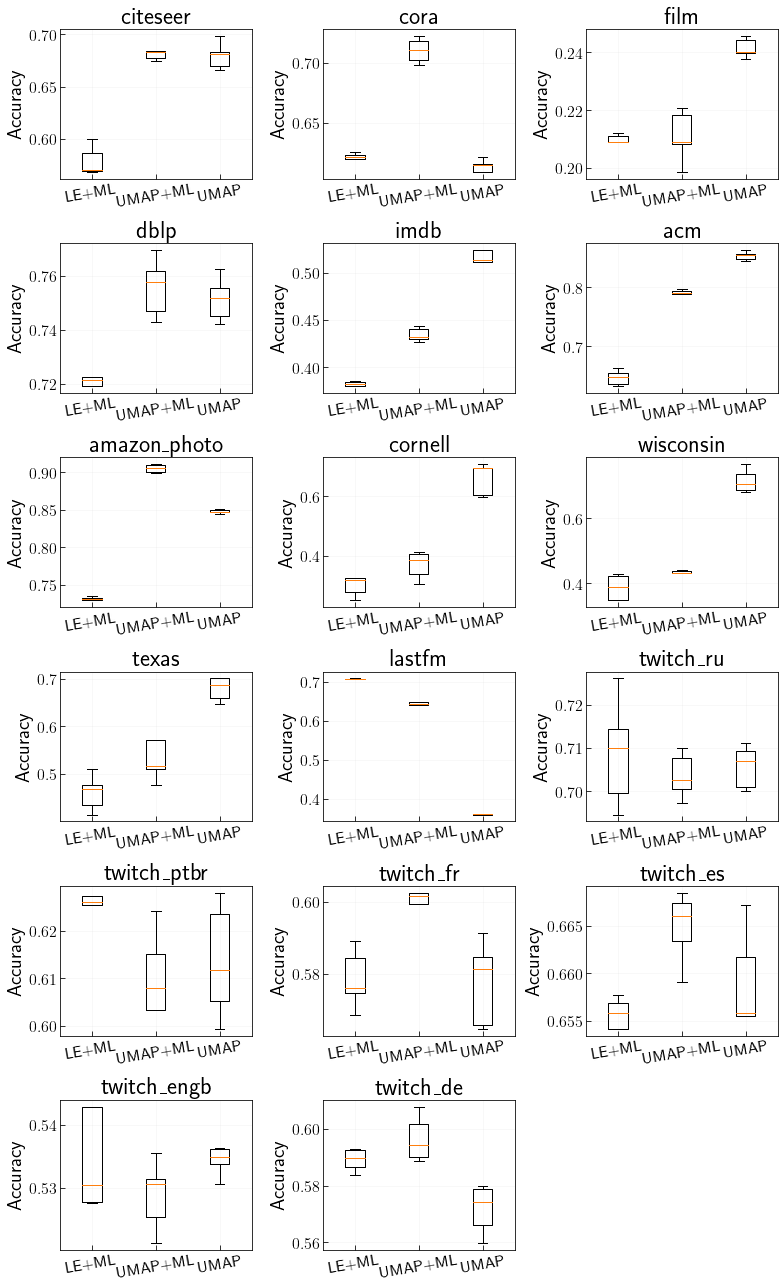

time: 3.78 s (started: 2022-12-22 09:30:42 +01:00)


In [160]:
def plot_nc_per_dataset(nc, title):
    plt.boxplot([nc['accuracy_le_ml'], nc['accuracy_umap_ml'], nc['accuracy_only_umap']], showfliers=False)
    plt.xticks([1, 2, 3], ['LE+ML', 'UMAP+ML', 'UMAP'], rotation=10)
    plt.ylabel('Accuracy')
    plt.title(title)
    
plt.figure(figsize=(11, 18))

plt.subplot(6, 3, 1)
plot_nc_per_dataset(citeseer_nc, 'citeseer')
plt.subplot(6, 3, 2)
plot_nc_per_dataset(cora_nc, 'cora')
plt.subplot(6, 3, 3)
plot_nc_per_dataset(film_nc, 'film')
plt.subplot(6, 3, 4)
plot_nc_per_dataset(dblp_nc, 'dblp')
plt.subplot(6, 3, 5)
plot_nc_per_dataset(imdb_nc, 'imdb')
plt.subplot(6, 3, 6)
plot_nc_per_dataset(acm_nc, 'acm')
plt.subplot(6, 3, 7)
plot_nc_per_dataset(amazon_photo_nc, 'amazon_photo')
plt.subplot(6, 3, 8)
plot_nc_per_dataset(cornell_nc, 'cornell')
plt.subplot(6, 3, 9)
plot_nc_per_dataset(wisconsin_nc, 'wisconsin')
plt.subplot(6, 3, 10)
plot_nc_per_dataset(texas_nc, 'texas')
plt.subplot(6, 3, 11)
plot_nc_per_dataset(lastfm_nc, 'lastfm')
plt.subplot(6, 3, 12)
plot_nc_per_dataset(twitch_ru_nc, 'twitch_ru')
plt.subplot(6, 3, 13)
plot_nc_per_dataset(twitch_ptbr_nc, 'twitch_ptbr')
plt.subplot(6, 3, 14)
plot_nc_per_dataset(twitch_fr_nc, 'twitch_fr')
plt.subplot(6, 3, 15)
plot_nc_per_dataset(twitch_es_nc, 'twitch_es')
plt.subplot(6, 3, 16)
plot_nc_per_dataset(twitch_engb_nc, 'twitch_engb')
plt.subplot(6, 3, 17)
plot_nc_per_dataset(twitch_de_nc, 'twitch_de')

plt.tight_layout()

# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/Report/homophily_10_datasets_tasks_comparison/plots/node_classification_comparison.pdf")
# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/Report/homophily-new-datasets-updated-link-prediction-19-12-22/plots/node_classification_comparison.pdf")

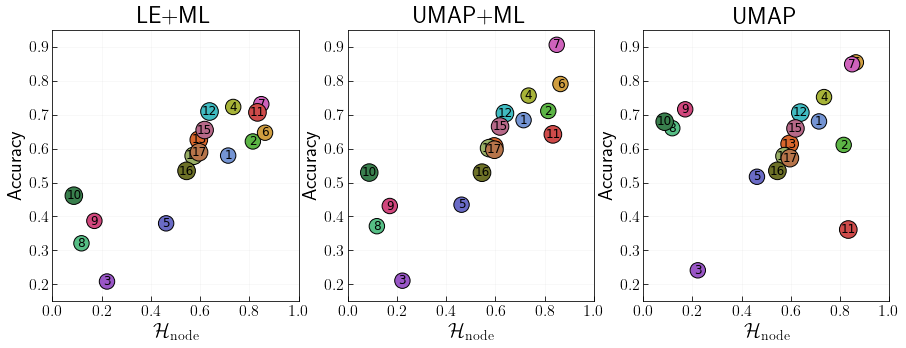

time: 1.17 s (started: 2022-12-22 09:31:13 +01:00)


In [161]:
nc_accuracy_le_ml = np.array([
    citeseer_nc['accuracy_le_ml'],
    cora_nc['accuracy_le_ml'],
    film_nc['accuracy_le_ml'],
    dblp_nc['accuracy_le_ml'],
    imdb_nc['accuracy_le_ml'],
    acm_nc['accuracy_le_ml'],
    amazon_photo_nc['accuracy_le_ml'],
    cornell_nc['accuracy_le_ml'],
    wisconsin_nc['accuracy_le_ml'],
    texas_nc['accuracy_le_ml'],
    lastfm_nc['accuracy_le_ml'],
    twitch_ru_nc['accuracy_le_ml'],
    twitch_ptbr_nc['accuracy_le_ml'],
    twitch_fr_nc['accuracy_le_ml'],
    twitch_es_nc['accuracy_le_ml'],
    twitch_engb_nc['accuracy_le_ml'],
    twitch_de_nc['accuracy_le_ml'],
])

nc_accuracy_umap_ml = np.array([
    citeseer_nc['accuracy_umap_ml'],
    cora_nc['accuracy_umap_ml'],
    film_nc['accuracy_umap_ml'],
    dblp_nc['accuracy_umap_ml'],
    imdb_nc['accuracy_umap_ml'],
    acm_nc['accuracy_umap_ml'],
    amazon_photo_nc['accuracy_umap_ml'],
    cornell_nc['accuracy_umap_ml'],
    wisconsin_nc['accuracy_umap_ml'],
    texas_nc['accuracy_umap_ml'],    
    lastfm_nc['accuracy_umap_ml'],
    twitch_ru_nc['accuracy_umap_ml'],
    twitch_ptbr_nc['accuracy_umap_ml'],
    twitch_fr_nc['accuracy_umap_ml'],
    twitch_es_nc['accuracy_umap_ml'],
    twitch_engb_nc['accuracy_umap_ml'],
    twitch_de_nc['accuracy_umap_ml'],
])

nc_accuracy_only_umap = np.array([
    citeseer_nc['accuracy_only_umap'],
    cora_nc['accuracy_only_umap'],
    film_nc['accuracy_only_umap'],
    dblp_nc['accuracy_only_umap'],
    imdb_nc['accuracy_only_umap'],
    acm_nc['accuracy_only_umap'],
    amazon_photo_nc['accuracy_only_umap'],
    cornell_nc['accuracy_only_umap'],
    wisconsin_nc['accuracy_only_umap'],
    texas_nc['accuracy_only_umap'],
    lastfm_nc['accuracy_only_umap'],
    twitch_ru_nc['accuracy_only_umap'],
    twitch_ptbr_nc['accuracy_only_umap'],
    twitch_fr_nc['accuracy_only_umap'],
    twitch_es_nc['accuracy_only_umap'],
    twitch_engb_nc['accuracy_only_umap'],
    twitch_de_nc['accuracy_only_umap'],
])

def plot_box_plot_per_option(nc_res, col):
    datasets = list(range(1, 18))
    for mean_acc, std_acc, h, c, name in zip(np.mean(nc_res, axis=1), np.std(nc_res, axis=1),
                                             df_all[col], colors, datasets):
        #plt.errorbar(h, mean_acc, yerr=std_acc, color=c, fmt='o')
        plt.text(h, mean_acc, name, ha="center", va="center",
                 bbox = dict(boxstyle=f"circle,pad=0.1", fc=c), fontsize=12, usetex=False)
    plt.ylim(0.15, 0.95)
    plt.ylabel('Accuracy')
    

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plot_box_plot_per_option(nc_accuracy_le_ml, 'H_node')
plt.xlabel(r'$\mathcal{H}_{\mathrm{node}}$')
plt.title('LE+ML')

plt.subplot(1, 3, 2)
plot_box_plot_per_option(nc_accuracy_umap_ml, 'H_node')
plt.xlabel(r'$\mathcal{H}_{\mathrm{node}}$')
plt.title('UMAP+ML')

plt.subplot(1, 3, 3)
plot_box_plot_per_option(nc_accuracy_only_umap, 'H_node')
plt.xlabel(r'$\mathcal{H}_{\mathrm{node}}$')
plt.title('UMAP')

# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/Report/homophily_10_datasets_tasks_comparison/plots/node_classification_vs_homophily_f_relevance.pdf")
# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/Report/homophily-new-datasets-updated-link-prediction-19-12-22/plots/node_classification_vs_homophily.pdf")

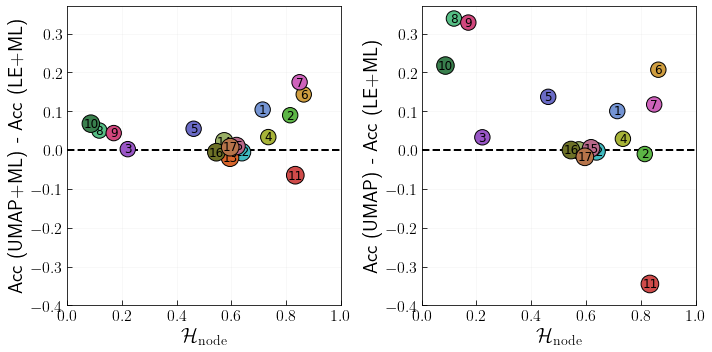

time: 713 ms (started: 2022-12-22 09:31:50 +01:00)


In [163]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plot_box_plot_per_option(nc_accuracy_umap_ml - nc_accuracy_le_ml, 'H_node')
plt.axhline(y=0, color='black', linestyle='--')
plt.ylim(-0.4, 0.37)
plt.ylabel('Acc (UMAP+ML) - Acc (LE+ML)')
plt.xlabel(r'$\mathcal{H}_{\mathrm{node}}$')

plt.subplot(1, 2, 2)
plot_box_plot_per_option(nc_accuracy_only_umap - nc_accuracy_le_ml, 'H_node')
plt.axhline(y=0, color='black', linestyle='--')
plt.ylim(-0.4, 0.37)
plt.ylabel('Acc (UMAP) - Acc (LE+ML)')
plt.xlabel(r'$\mathcal{H}_{\mathrm{node}}$')

plt.tight_layout()

# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/Report/homophily_10_datasets_tasks_comparison/plots/node_classification_difference_vs_homophily_f_relevance.pdf")
# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/Report/homophily-new-datasets-updated-link-prediction-19-12-22/plots/node_classification_difference_vs_homophily.pdf")

## Greedy routing

In [164]:
def load_greedy_routing(path):    
    ps_le_ml = pd.read_csv(glob.glob(f"{path}/le_ml/*.mgr")[0])['p_s'].values[0]
    ps_umap_ml = pd.read_csv(glob.glob(f"{path}/umap_ml/*.mgr")[0])['p_s'].values[0]
    ps_only_umap = pd.read_csv(glob.glob(f"{path}/only_umap/*.mgr")[0])['p_s'].values[0]
    return {
        'ps_le_ml': ps_le_ml,
        'ps_umap_ml': ps_umap_ml,
        'ps_only_umap': ps_only_umap
    }


base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/"

citeseer_gr = load_greedy_routing(f"{base_path}/citeseer/umap")
cora_gr = load_greedy_routing(f"{base_path}/cora/umap")
film_gr = load_greedy_routing(f"{base_path}/film/umap")
dblp_gr = load_greedy_routing(f"{base_path}/dblp/umap")
imdb_gr = load_greedy_routing(f"{base_path}/imdb/umap")
acm_gr = load_greedy_routing(f"{base_path}/acm/umap")
amazon_photo_gr = load_greedy_routing(f"{base_path}/amazon_photo/umap")
cornell_gr = load_greedy_routing(f"{base_path}/webkb/cornell/umap")
wisconsin_gr = load_greedy_routing(f"{base_path}/webkb/wisconsin/umap")
texas_gr = load_greedy_routing(f"{base_path}/webkb/texas/umap")
lastfm_gr = load_greedy_routing(f"{base_path}/lastfm_asia/umap")
twitch_ru_gr = load_greedy_routing(f"{base_path}/twitch/RU/umap")
twitch_ptbr_gr = load_greedy_routing(f"{base_path}/twitch/PTBR/umap")
twitch_fr_gr = load_greedy_routing(f"{base_path}/twitch/FR/umap")
twitch_es_gr = load_greedy_routing(f"{base_path}/twitch/ES/umap")
twitch_engb_gr = load_greedy_routing(f"{base_path}/twitch/ENGB/umap")
twitch_de_gr = load_greedy_routing(f"{base_path}/twitch/DE/umap")

time: 92.1 ms (started: 2022-12-22 09:34:33 +01:00)


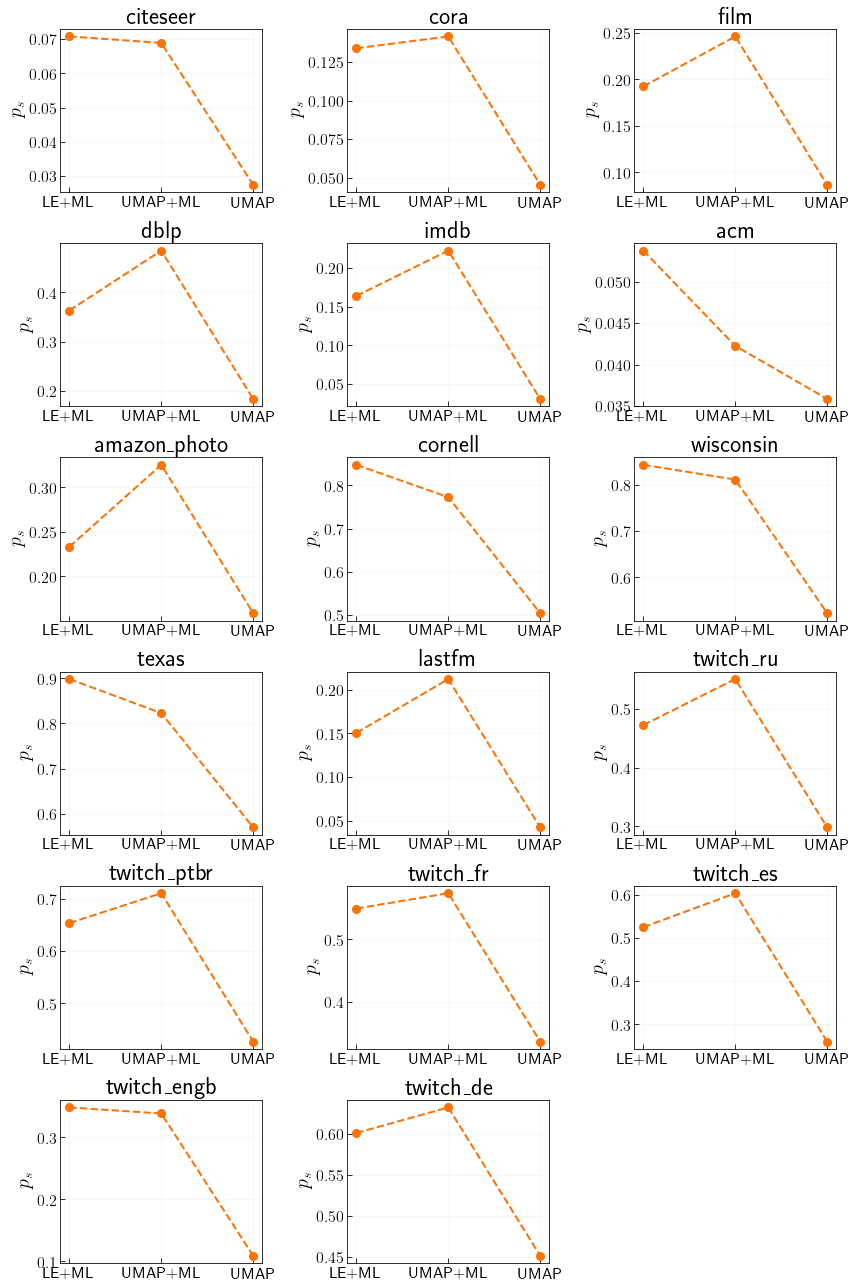

time: 2.12 s (started: 2022-12-22 09:34:48 +01:00)


In [165]:
def plot_gr_per_dataset(ps, title):
    plt.plot([ps['ps_le_ml'], ps['ps_umap_ml'], ps['ps_only_umap']], 
             color='xkcd:orange', marker='o', linestyle='--')
    plt.xticks([0, 1, 2], ['LE+ML', 'UMAP+ML', 'UMAP'])
    plt.ylabel(r'$p_s$')
    plt.title(title)
    
plt.figure(figsize=(12, 18))

plt.subplot(6, 3, 1)
plot_gr_per_dataset(citeseer_gr, 'citeseer')
plt.subplot(6, 3, 2)
plot_gr_per_dataset(cora_gr, 'cora')
plt.subplot(6, 3, 3)
plot_gr_per_dataset(film_gr, 'film')
plt.subplot(6, 3, 4)
plot_gr_per_dataset(dblp_gr, 'dblp')
plt.subplot(6, 3, 5)
plot_gr_per_dataset(imdb_gr, 'imdb')
plt.subplot(6, 3, 6)
plot_gr_per_dataset(acm_gr, 'acm')
plt.subplot(6, 3, 7)
plot_gr_per_dataset(amazon_photo_gr, 'amazon_photo')
plt.subplot(6, 3, 8)
plot_gr_per_dataset(cornell_gr, 'cornell')
plt.subplot(6, 3, 9)
plot_gr_per_dataset(wisconsin_gr, 'wisconsin')
plt.subplot(6, 3, 10)
plot_gr_per_dataset(texas_gr, 'texas')
plt.subplot(6, 3, 11)
plot_gr_per_dataset(lastfm_gr, 'lastfm')
plt.subplot(6, 3, 12)
plot_gr_per_dataset(twitch_ru_gr, 'twitch_ru')
plt.subplot(6, 3, 13)
plot_gr_per_dataset(twitch_ptbr_gr, 'twitch_ptbr')
plt.subplot(6, 3, 14)
plot_gr_per_dataset(twitch_fr_gr, 'twitch_fr')
plt.subplot(6, 3, 15)
plot_gr_per_dataset(twitch_es_gr, 'twitch_es')
plt.subplot(6, 3, 16)
plot_gr_per_dataset(twitch_engb_gr, 'twitch_engb')
plt.subplot(6, 3, 17)
plot_gr_per_dataset(twitch_de_gr, 'twitch_de')


plt.tight_layout()

# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/Report/homophily_10_datasets_tasks_comparison/plots/greedy_routing_comparison.pdf")
# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/Report/homophily-new-datasets-updated-link-prediction-19-12-22/plots/greedy_routing_comparison.pdf")

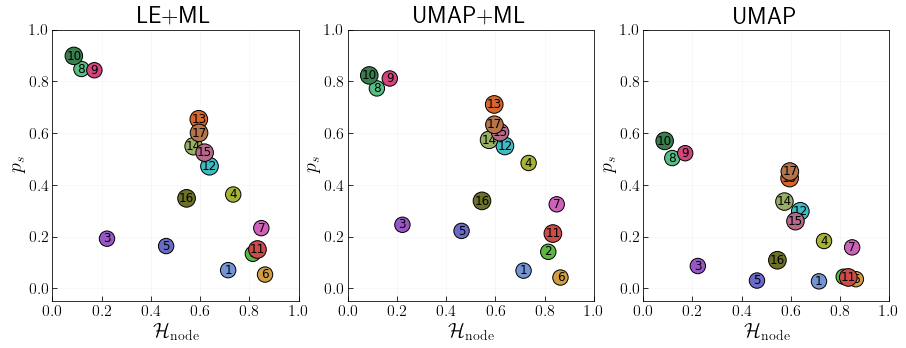

time: 889 ms (started: 2022-12-22 09:35:21 +01:00)


In [167]:
ps_le_ml = np.array([
    citeseer_gr['ps_le_ml'],
    cora_gr['ps_le_ml'],
    film_gr['ps_le_ml'],
    dblp_gr['ps_le_ml'],
    imdb_gr['ps_le_ml'],
    acm_gr['ps_le_ml'],
    amazon_photo_gr['ps_le_ml'],
    cornell_gr['ps_le_ml'],
    wisconsin_gr['ps_le_ml'],
    texas_gr['ps_le_ml'],
    lastfm_gr['ps_le_ml'],
    twitch_ru_gr['ps_le_ml'],
    twitch_ptbr_gr['ps_le_ml'],
    twitch_fr_gr['ps_le_ml'],
    twitch_es_gr['ps_le_ml'],
    twitch_engb_gr['ps_le_ml'],
    twitch_de_gr['ps_le_ml'],
])

ps_umap_ml = np.array([
    citeseer_gr['ps_umap_ml'],
    cora_gr['ps_umap_ml'],
    film_gr['ps_umap_ml'],
    dblp_gr['ps_umap_ml'],
    imdb_gr['ps_umap_ml'],
    acm_gr['ps_umap_ml'],
    amazon_photo_gr['ps_umap_ml'],
    cornell_gr['ps_umap_ml'],
    wisconsin_gr['ps_umap_ml'],
    texas_gr['ps_umap_ml'],    
    lastfm_gr['ps_umap_ml'],
    twitch_ru_gr['ps_umap_ml'],
    twitch_ptbr_gr['ps_umap_ml'],
    twitch_fr_gr['ps_umap_ml'],
    twitch_es_gr['ps_umap_ml'],
    twitch_engb_gr['ps_umap_ml'],
    twitch_de_gr['ps_umap_ml'],
])

ps_only_umap = np.array([
    citeseer_gr['ps_only_umap'],
    cora_gr['ps_only_umap'],
    film_gr['ps_only_umap'],
    dblp_gr['ps_only_umap'],
    imdb_gr['ps_only_umap'],
    acm_gr['ps_only_umap'],
    amazon_photo_gr['ps_only_umap'],
    cornell_gr['ps_only_umap'],
    wisconsin_gr['ps_only_umap'],
    texas_gr['ps_only_umap'],
    lastfm_gr['ps_only_umap'],
    twitch_ru_gr['ps_only_umap'],
    twitch_ptbr_gr['ps_only_umap'],
    twitch_fr_gr['ps_only_umap'],
    twitch_es_gr['ps_only_umap'],
    twitch_engb_gr['ps_only_umap'],
    twitch_de_gr['ps_only_umap'],
])


def plot_gr_per_option(gr_res, col):
    datasets = list(range(1, 18))
    for gr, h, c, name in zip(gr_res, df_all[col], colors, datasets):
        plt.text(h, gr, name, ha="center", va="center",
                 bbox = dict(boxstyle=f"circle,pad=0.1", fc=c), fontsize=12, usetex=False)
    plt.ylim(-0.05, 1)
    plt.ylabel(r'$p_s$')
    

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plot_gr_per_option(ps_le_ml, 'H_node')
plt.title('LE+ML')
plt.xlabel(r'$\mathcal{H}_{\mathrm{node}}$')

plt.subplot(1, 3, 2)
plot_gr_per_option(ps_umap_ml, 'H_node')
plt.title('UMAP+ML')
plt.xlabel(r'$\mathcal{H}_{\mathrm{node}}$')

plt.subplot(1, 3, 3)
plot_gr_per_option(ps_only_umap, 'H_node')
plt.title('UMAP')
plt.xlabel(r'$\mathcal{H}_{\mathrm{node}}$')

# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/Report/homophily_10_datasets_tasks_comparison/plots/greedy_routing_vs_homophily_f_relevance.pdf")
# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/Report/homophily-new-datasets-updated-link-prediction-19-12-22/plots/greedy_routing_vs_homophily.pdf")

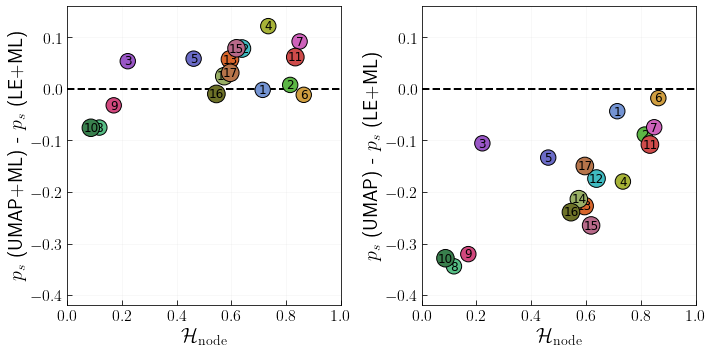

time: 1.02 s (started: 2022-12-22 09:35:41 +01:00)


In [168]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plot_gr_per_option(ps_umap_ml - ps_le_ml, 'H_node')
plt.axhline(y=0, color='black', linestyle='--')
plt.ylim(-0.42, 0.16)
plt.ylabel(r'$p_s$ (UMAP+ML) - $p_s$ (LE+ML)')
plt.xlabel(r'$\mathcal{H}_{\mathrm{node}}$')

plt.subplot(1, 2, 2)
plot_gr_per_option(ps_only_umap - ps_le_ml, 'H_node')
plt.axhline(y=0, color='black', linestyle='--')
plt.ylim(-0.42, 0.16)
plt.ylabel(r'$p_s$ (UMAP) - $p_s$ (LE+ML)')
plt.xlabel(r'$\mathcal{H}_{\mathrm{node}}$')

plt.tight_layout()
# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/Report/homophily_10_datasets_tasks_comparison/plots/greedy_routing_difference_vs_homophily_f_relevance.pdf")
# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/Report/homophily-new-datasets-updated-link-prediction-19-12-22/plots/greedy_routing_difference_vs_homophily.pdf")

## Community concentration

In [169]:
%load_ext Cython

time: 473 ms (started: 2022-12-22 09:38:18 +01:00)


In [170]:
%%cython --compile-args=-ffast-math --compile-args=-funroll-loops --compile-args=-ftree-loop-distribution --compile-args=-mtune=native
# distutils: language = c++

cimport cython
cimport numpy as np
import numpy as np
from libcpp.vector cimport vector
from libcpp cimport bool

from libc.math cimport exp, pi, cos, sin, sqrt, pow, acos
    
cdef class FractionNodesVsNeighbours:
    
    cdef int dim, n_labels
    cdef list labels, nodes
    cdef public np.float64_t[:, :] distance_matrix
    cdef public np.float64_t[:] cluster_probabilities
    
    
    def __init__(self, int dim, np.float64_t[:, :] positions, np.float64_t[:] thetas, list labels):
        # NOTE: list of labels should start with 0 and go to (n_labels - 1)
        self.dim = dim
        self.distance_matrix = self.get_distance_matrix(dim, positions, thetas)
        self.labels = labels
        self.nodes = list(np.arange(len(labels)))
        self.n_labels = len(set(self.labels))
        self.compute_probability_per_label()
        
    
    @cython.boundscheck(False)
    @cython.wraparound(False)
    @cython.cdivision      
    cdef compute_probability_per_label(self):
        cdef dict n_nodes_per_group = {}
        for i, l in enumerate(self.labels):
            if l not in n_nodes_per_group:
                n_nodes_per_group[l] = 0
            n_nodes_per_group[l] += 1
            
        self.cluster_probabilities = np.zeros(self.n_labels)    
        for l, v in n_nodes_per_group.items():
            self.cluster_probabilities[l] = v / len(self.labels)
    
    
    @cython.boundscheck(False)
    @cython.wraparound(False)
    def compute_fraction_nodes_vs_neighbours_all_classes(self, int num_n_neighbours=30):
        """
        Format of the output
        
        [{n_neighbours_1: [results for the n_neigbours, ..]}, {}, ...]
        """
        cdef dict results = {}
        all_n_neighbours = np.linspace(2, len(self.nodes), num=num_n_neighbours).astype(int)        
        for n_neighbours in all_n_neighbours:
            results[n_neighbours] = self.iterate_over_nodes(self.nodes, n_neighbours)
        return results
    
    
    @cython.boundscheck(False)
    @cython.wraparound(False)
    def compute_fraction_nodes_vs_neighbours_per_class(self, int num_n_neighbours=30):
        """
        Format of the output
        
        {label_1: [{n_neighbours_1: [results for the n_neigbours, ..]}, {}, ...],
         label_2: ...}
        """
        cdef dict nodes_per_group = {}    
        for i, l in enumerate(self.labels):
            if l not in nodes_per_group:
                nodes_per_group[l] = []
            nodes_per_group[l].append(i)

        cdef dict results = {}
        cdef dict res = {}
        # Start with a node and its neighbour (not with 1)
        all_n_neighbours = np.linspace(2, len(self.nodes), num=num_n_neighbours).astype(int)
        for l, nodes_to_consider in nodes_per_group.items():
            res = {}
            for n_neighbours in all_n_neighbours:
                res[n_neighbours] = self.iterate_over_nodes(nodes_to_consider, n_neighbours)
            results[l] = res
            print(f'Done for class {l}/{self.n_labels}')
        return results

    
    @cython.boundscheck(False)
    @cython.wraparound(False)
    @cython.cdivision
    cdef iterate_over_nodes(self, list nodes_to_consider, int n_neighbours):
        all_fraction = []
        for n1 in nodes_to_consider:
            neighbours = []
            for n2 in self.nodes:
                # Here I iterate over the same node, i.e., distance=0
                neighbours.append((self.distance_matrix[n1, n2], self.labels[n2]))
            
            neighbours = sorted(neighbours, key=lambda x: x[0])
            neighbours = [x[1] for x in neighbours[:n_neighbours]]
            
            l1 = self.labels[n1]
            fraction = neighbours.count(l1) / n_neighbours
            # Weighted by the cluster probability (size of the cluster)
            all_fraction.append(fraction / self.cluster_probabilities[l1])
        return all_fraction

    
    @cython.boundscheck(False)
    @cython.wraparound(False)
    cdef get_distance_matrix(self, int dim, np.float64_t[:, :] positions, np.float64_t[:] thetas):
        if dim == 1:
            return self.get_distance_matrix_S1(thetas)
        else:
            return self.get_distance_matrix_SD(dim, positions)
        
        
    @cython.boundscheck(False)
    @cython.wraparound(False)
    cdef get_distance_matrix_S1(self, np.float64_t[:] thetas):
        cdef int size = len(thetas)
        cdef np.float64_t[:, :] mat = np.empty((size, size))
        for i in range(size):
            for j in range(size):
                angle = pi - abs(pi - abs(thetas[i] - thetas[j]))
                mat[i, j] = angle
                mat[j, i] = angle
        return mat
    
    
    @cython.boundscheck(False)
    @cython.wraparound(False)
    cdef get_distance_matrix_SD(self, int dim, np.float64_t[:, :] positions):
        cdef int size = positions.shape[0]
        cdef np.float64_t[:, :] mat = np.empty((size, size))
        for i in range(size):
            for j in range(size):
                angle = self.compute_angle_vectors(dim, positions[i], positions[j])
                mat[i, j] = angle
                mat[j, i] = angle
        return mat
    
    
    @cython.boundscheck(False)
    @cython.wraparound(False)
    cdef compute_angle_vectors(self, int dim, np.float64_t[:] v1, np.float64_t[:] v2):
        cdef float angle = 0, norm1 = 0, norm2 = 0
        for i in range(dim + 1): 
            angle += v1[i] * v2[i]
            norm1 += v1[i] * v1[i]
            norm2 += v2[i] * v2[i]
        
        norm1 /= sqrt(norm1)
        norm2 /= sqrt(norm2)
        cdef float result = angle / (norm1 * norm2)
        if (abs(result - 1) < 1e-10):
            return 0.0
        else:
            return acos(result)

time: 12.3 ms (started: 2022-12-22 09:38:19 +01:00)


In [171]:
def compute_fraction_nodes_vs_neighbours(df_le_ml, df_umap_ml, df_only_umap, resolution=50):
    xy = FractionNodesVsNeighbours(2, 
                                   df_le_ml[['p1', 'p2', 'p3']].values, 
                                   np.array([0.]), 
                                   (df_le_ml['encoded_label'].values).tolist())
    fraction_vs_n_neighbours_le_ml = xy.compute_fraction_nodes_vs_neighbours_all_classes(resolution)
    print('LE+ML done.')
    
    xy = FractionNodesVsNeighbours(2, 
                                   df_umap_ml[['p1', 'p2', 'p3']].values, 
                                   np.array([0.]), 
                                   (df_umap_ml['encoded_label'].values).tolist())
    fraction_vs_n_neighbours_umap_ml = xy.compute_fraction_nodes_vs_neighbours_all_classes(resolution)
    print('UMAP+ML done.')
    
    xy = FractionNodesVsNeighbours(2, 
                                   df_only_umap[['p1', 'p2', 'p3']].values, 
                                   np.array([0.]), 
                                   (df_only_umap['encoded_label'].values).tolist())
    fraction_vs_n_neighbours_only_umap = xy.compute_fraction_nodes_vs_neighbours_all_classes(resolution)
    print('UMAP done.')
    
    return {
        'fraction_vs_n_neighbours_le_ml': fraction_vs_n_neighbours_le_ml,
        'fraction_vs_n_neighbours_umap_ml': fraction_vs_n_neighbours_umap_ml,
        'fraction_vs_n_neighbours_only_umap': fraction_vs_n_neighbours_only_umap
    }

time: 1.49 ms (started: 2022-12-22 09:38:22 +01:00)


In [172]:
citeseer_cc = compute_fraction_nodes_vs_neighbours(citeseer_le_ml, citeseer_umap_ml, citeseer_only_umap)

LE+ML done.
UMAP+ML done.
UMAP done.
time: 3min 2s (started: 2022-12-22 09:38:24 +01:00)


In [173]:
cora_cc = compute_fraction_nodes_vs_neighbours(cora_le_ml, cora_umap_ml, cora_only_umap)

LE+ML done.
UMAP+ML done.
UMAP done.
time: 3min 7s (started: 2022-12-22 09:41:26 +01:00)


In [174]:
film_cc = compute_fraction_nodes_vs_neighbours(film_le_ml, film_umap_ml, film_only_umap)

LE+ML done.
UMAP+ML done.
UMAP done.
time: 50min 57s (started: 2022-12-22 09:44:34 +01:00)


In [175]:
dblp_cc = compute_fraction_nodes_vs_neighbours(dblp_le_ml, dblp_umap_ml, dblp_only_umap)

LE+ML done.
UMAP+ML done.
UMAP done.
time: 4min 22s (started: 2022-12-22 10:35:32 +01:00)


In [176]:
imdb_cc = compute_fraction_nodes_vs_neighbours(imdb_le_ml, imdb_umap_ml, imdb_only_umap)

LE+ML done.
UMAP+ML done.
UMAP done.
time: 8min 34s (started: 2022-12-22 10:39:54 +01:00)


In [177]:
acm_cc = compute_fraction_nodes_vs_neighbours(acm_le_ml, acm_umap_ml, acm_only_umap)

LE+ML done.
UMAP+ML done.
UMAP done.
time: 2min 34s (started: 2022-12-22 10:48:28 +01:00)


In [178]:
amazon_photo_cc = compute_fraction_nodes_vs_neighbours(
    amazon_photo_le_ml, amazon_photo_umap_ml, amazon_photo_only_umap)

LE+ML done.
UMAP+ML done.
UMAP done.
time: 43min 56s (started: 2022-12-22 10:51:02 +01:00)


In [179]:
cornell_cc = compute_fraction_nodes_vs_neighbours(cornell_le_ml, cornell_umap_ml, cornell_only_umap)

LE+ML done.
UMAP+ML done.
UMAP done.
time: 703 ms (started: 2022-12-22 11:34:59 +01:00)


In [180]:
wisconsin_cc = compute_fraction_nodes_vs_neighbours(wisconsin_le_ml, wisconsin_umap_ml, wisconsin_only_umap)

LE+ML done.
UMAP+ML done.
UMAP done.
time: 1.29 s (started: 2022-12-22 11:35:00 +01:00)


In [181]:
texas_cc = compute_fraction_nodes_vs_neighbours(texas_le_ml, texas_umap_ml, texas_only_umap)

LE+ML done.
UMAP+ML done.
UMAP done.
time: 663 ms (started: 2022-12-22 11:35:01 +01:00)


In [182]:
lastfm_cc = compute_fraction_nodes_vs_neighbours(lastfm_le_ml, lastfm_umap_ml, lastfm_only_umap)

LE+ML done.
UMAP+ML done.
UMAP done.
time: 43min 38s (started: 2022-12-22 11:35:02 +01:00)


In [183]:
twitch_ru_cc = compute_fraction_nodes_vs_neighbours(twitch_ru_le_ml, twitch_ru_umap_ml, twitch_ru_only_umap)

LE+ML done.
UMAP+ML done.
UMAP done.
time: 11min 54s (started: 2022-12-22 12:18:40 +01:00)


In [184]:
twitch_ptbr_cc = compute_fraction_nodes_vs_neighbours(twitch_ptbr_le_ml, twitch_ptbr_umap_ml, twitch_ptbr_only_umap)

LE+ML done.
UMAP+ML done.
UMAP done.
time: 2min 20s (started: 2022-12-22 12:30:35 +01:00)


In [185]:
twitch_fr_cc = compute_fraction_nodes_vs_neighbours(twitch_fr_le_ml, twitch_fr_umap_ml, twitch_fr_only_umap)

LE+ML done.
UMAP+ML done.
UMAP done.
time: 37min 50s (started: 2022-12-22 12:32:55 +01:00)


In [186]:
twitch_es_cc = compute_fraction_nodes_vs_neighbours(twitch_es_le_ml, twitch_es_umap_ml, twitch_es_only_umap)

LE+ML done.
UMAP+ML done.
UMAP done.
time: 18min 5s (started: 2022-12-22 13:10:46 +01:00)


In [187]:
twitch_engb_cc = compute_fraction_nodes_vs_neighbours(twitch_engb_le_ml, twitch_engb_umap_ml, twitch_engb_only_umap)

LE+ML done.
UMAP+ML done.
UMAP done.
time: 41min 33s (started: 2022-12-22 13:28:51 +01:00)


In [188]:
twitch_de_cc = compute_fraction_nodes_vs_neighbours(twitch_de_le_ml, twitch_de_umap_ml, twitch_de_only_umap)

LE+ML done.
UMAP+ML done.
UMAP done.
time: 1h 24min 1s (started: 2022-12-22 14:10:25 +01:00)


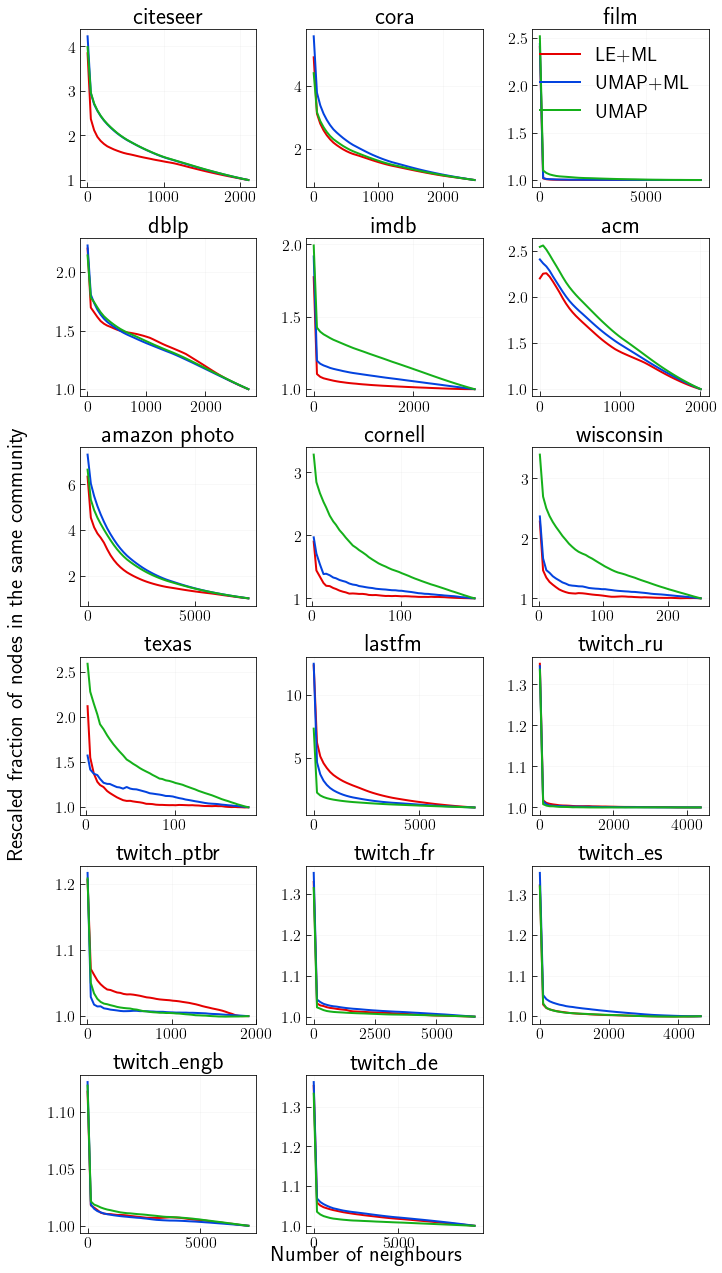

time: 2.14 s (started: 2022-12-22 15:34:27 +01:00)


In [189]:
def plot_fraction_of_nodes_in_community_per_dataset(cc, title):
    plt.plot(cc['fraction_vs_n_neighbours_le_ml'].keys(), 
             [np.mean(x) for x in cc['fraction_vs_n_neighbours_le_ml'].values()], 
             label='LE+ML', color='xkcd:red')
    plt.plot(cc['fraction_vs_n_neighbours_umap_ml'].keys(), 
             [np.mean(x) for x in cc['fraction_vs_n_neighbours_umap_ml'].values()], 
             label='UMAP+ML', color='xkcd:blue')
    plt.plot(cc['fraction_vs_n_neighbours_only_umap'].keys(), 
             [np.mean(x) for x in cc['fraction_vs_n_neighbours_only_umap'].values()], 
             label='UMAP', color='xkcd:green')
    plt.title(title)
    
    
plt.figure(figsize=(10, 18))

plt.subplot(6, 3, 1)
plot_fraction_of_nodes_in_community_per_dataset(citeseer_cc, 'citeseer')
plt.subplot(6, 3, 2)
plot_fraction_of_nodes_in_community_per_dataset(cora_cc, 'cora')
plt.subplot(6, 3, 3)
plot_fraction_of_nodes_in_community_per_dataset(film_cc, 'film')
plt.legend(loc='upper right', fontsize=20)
plt.subplot(6, 3, 4)
plot_fraction_of_nodes_in_community_per_dataset(dblp_cc, 'dblp')
plt.subplot(6, 3, 5)
plot_fraction_of_nodes_in_community_per_dataset(imdb_cc, 'imdb')
plt.subplot(6, 3, 6)
plot_fraction_of_nodes_in_community_per_dataset(acm_cc, 'acm')
plt.subplot(6, 3, 7)
plot_fraction_of_nodes_in_community_per_dataset(amazon_photo_cc, 'amazon photo')
plt.subplot(6, 3, 8)
plot_fraction_of_nodes_in_community_per_dataset(cornell_cc, 'cornell')
plt.subplot(6, 3, 9)
plot_fraction_of_nodes_in_community_per_dataset(wisconsin_cc, 'wisconsin')
plt.subplot(6, 3, 10)
plot_fraction_of_nodes_in_community_per_dataset(texas_cc, 'texas')
plt.subplot(6, 3, 11)
plot_fraction_of_nodes_in_community_per_dataset(lastfm_cc, 'lastfm')
plt.subplot(6, 3, 12)
plot_fraction_of_nodes_in_community_per_dataset(twitch_ru_cc, 'twitch_ru')
plt.subplot(6, 3, 13)
plot_fraction_of_nodes_in_community_per_dataset(twitch_ptbr_cc, 'twitch_ptbr')
plt.subplot(6, 3, 14)
plot_fraction_of_nodes_in_community_per_dataset(twitch_fr_cc, 'twitch_fr')
plt.subplot(6, 3, 15)
plot_fraction_of_nodes_in_community_per_dataset(twitch_es_cc, 'twitch_es')
plt.subplot(6, 3, 16)
plot_fraction_of_nodes_in_community_per_dataset(twitch_engb_cc, 'twitch_engb')
plt.subplot(6, 3, 17)
plot_fraction_of_nodes_in_community_per_dataset(twitch_de_cc, 'twitch_de')

fig = plt.gcf()
fig.supxlabel(r'Number of neighbours', fontsize=22, y=0.02)
fig.supylabel('Rescaled fraction of nodes in the same community', fontsize=22, x=0)

plt.tight_layout()

# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/Report/homophily_10_datasets_tasks_comparison/plots/community_concentration_comparison.pdf")

In [190]:
def get_community_concentration(cc, df):
    closest_val = min(cc['fraction_vs_n_neighbours_le_ml'].keys(), key=lambda x: abs(x - 0.1*len(df)))
    cc_le_ml = np.mean(cc['fraction_vs_n_neighbours_le_ml'][closest_val])
    cc_umap_ml = np.mean(cc['fraction_vs_n_neighbours_umap_ml'][closest_val])
    cc_only_umap = np.mean(cc['fraction_vs_n_neighbours_only_umap'][closest_val])
    
    probs_communities = np.unique(df['encoded_label'], return_counts=True)[1]
    probs_communities = np.array(probs_communities)
    probs_communities = probs_communities / np.sum(probs_communities)
    p_max = np.mean(1 / probs_communities)
    
    return {
        'cc_le_ml': cc_le_ml / p_max,
        'cc_umap_ml': cc_umap_ml / p_max,
        'cc_only_umap': cc_only_umap / p_max
    }
    

citeseer_cc_0_1 = get_community_concentration(citeseer_cc, citeseer_le_ml)
cora_cc_0_1 = get_community_concentration(cora_cc, cora_le_ml)
film_cc_0_1 = get_community_concentration(film_cc, film_le_ml)
dblp_cc_0_1 = get_community_concentration(dblp_cc, dblp_le_ml)
imdb_cc_0_1 = get_community_concentration(imdb_cc, imdb_le_ml)
acm_cc_0_1 = get_community_concentration(acm_cc, acm_le_ml)
amazon_photo_cc_0_1 = get_community_concentration(amazon_photo_cc, amazon_photo_le_ml)
cornell_cc_0_1 = get_community_concentration(cornell_cc, cornell_le_ml)
wisconsin_cc_0_1 = get_community_concentration(wisconsin_cc, wisconsin_le_ml)
texas_cc_0_1 = get_community_concentration(texas_cc, texas_le_ml)
lastfm_cc_0_1 = get_community_concentration(lastfm_cc, lastfm_le_ml)
twitch_ru_cc_0_1 = get_community_concentration(twitch_ru_cc, twitch_ru_le_ml)
twitch_ptbr_cc_0_1 = get_community_concentration(twitch_ptbr_cc, twitch_ptbr_le_ml)
twitch_fr_cc_0_1 = get_community_concentration(twitch_fr_cc, twitch_fr_le_ml)
twitch_es_cc_0_1 = get_community_concentration(twitch_es_cc, twitch_es_le_ml)
twitch_engb_cc_0_1 = get_community_concentration(twitch_engb_cc, twitch_engb_le_ml)
twitch_de_cc_0_1 = get_community_concentration(twitch_de_cc, twitch_de_le_ml)

time: 38.3 ms (started: 2022-12-22 15:34:29 +01:00)


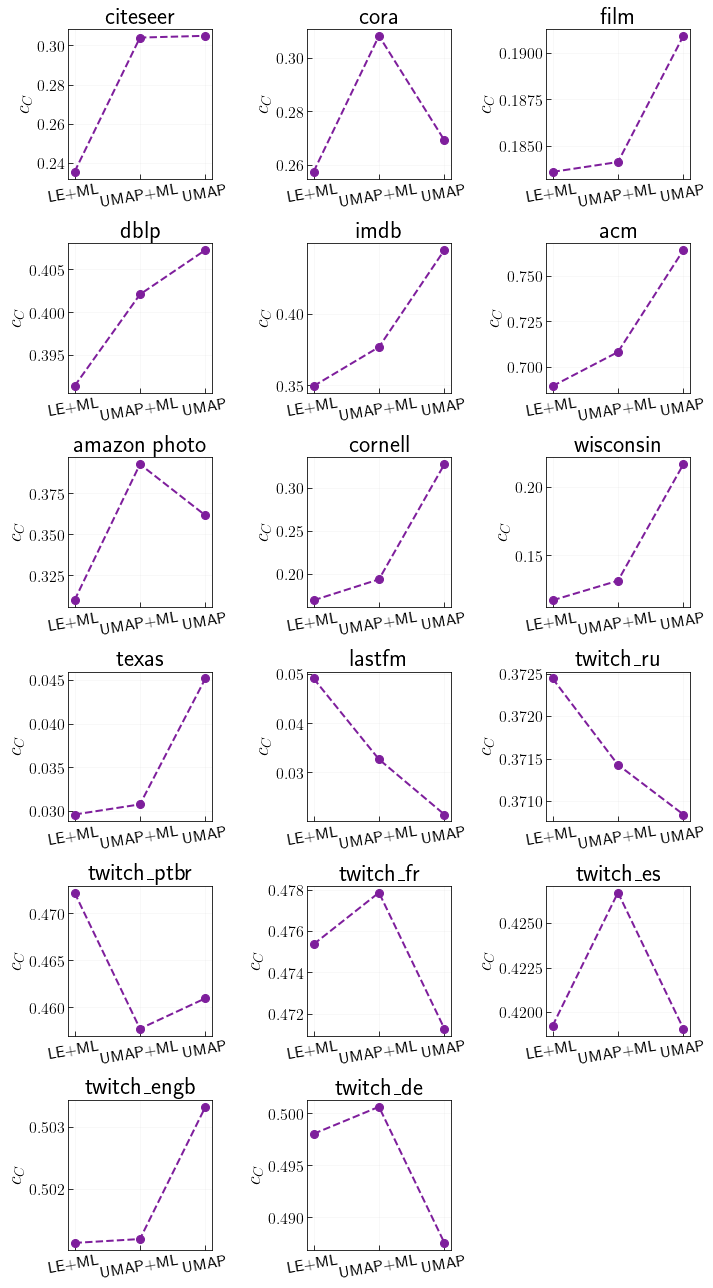

time: 1.52 s (started: 2022-12-22 15:34:29 +01:00)


In [191]:
def plot_community_concentration_per_dataset(cc_0_1, title):
    plt.plot([cc_0_1['cc_le_ml'], cc_0_1['cc_umap_ml'], cc_0_1['cc_only_umap']], 
             color='xkcd:purple', marker='o', linestyle='--')
    plt.xticks([0, 1, 2], ['LE+ML', 'UMAP+ML', 'UMAP'], rotation=10)
    plt.ylabel(r'$c_C$')
    plt.title(title)
    
    
plt.figure(figsize=(10, 18))

plt.subplot(6, 3, 1)
plot_community_concentration_per_dataset(citeseer_cc_0_1, 'citeseer')
plt.subplot(6, 3, 2)
plot_community_concentration_per_dataset(cora_cc_0_1, 'cora')
plt.subplot(6, 3, 3)
plot_community_concentration_per_dataset(film_cc_0_1, 'film')
plt.subplot(6, 3, 4)
plot_community_concentration_per_dataset(dblp_cc_0_1, 'dblp')
plt.subplot(6, 3, 5)
plot_community_concentration_per_dataset(imdb_cc_0_1, 'imdb')
plt.subplot(6, 3, 6)
plot_community_concentration_per_dataset(acm_cc_0_1, 'acm')
plt.subplot(6, 3, 7)
plot_community_concentration_per_dataset(amazon_photo_cc_0_1, 'amazon photo')
plt.subplot(6, 3, 8)
plot_community_concentration_per_dataset(cornell_cc_0_1, 'cornell')
plt.subplot(6, 3, 9)
plot_community_concentration_per_dataset(wisconsin_cc_0_1, 'wisconsin')
plt.subplot(6, 3, 10)
plot_community_concentration_per_dataset(texas_cc_0_1, 'texas')
plt.subplot(6, 3, 11)
plot_community_concentration_per_dataset(lastfm_cc_0_1, 'lastfm')
plt.subplot(6, 3, 12)
plot_community_concentration_per_dataset(twitch_ru_cc_0_1, 'twitch_ru')
plt.subplot(6, 3, 13)
plot_community_concentration_per_dataset(twitch_ptbr_cc_0_1, 'twitch_ptbr')
plt.subplot(6, 3, 14)
plot_community_concentration_per_dataset(twitch_fr_cc_0_1, 'twitch_fr')
plt.subplot(6, 3, 15)
plot_community_concentration_per_dataset(twitch_es_cc_0_1, 'twitch_es')
plt.subplot(6, 3, 16)
plot_community_concentration_per_dataset(twitch_engb_cc_0_1, 'twitch_engb')
plt.subplot(6, 3, 17)
plot_community_concentration_per_dataset(twitch_de_cc_0_1, 'twitch_de')

plt.tight_layout()

# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/Report/homophily_10_datasets_tasks_comparison/plots/community_concentration_comparison_0_1.pdf")

Text(0.5, 1.0, 'UMAP')

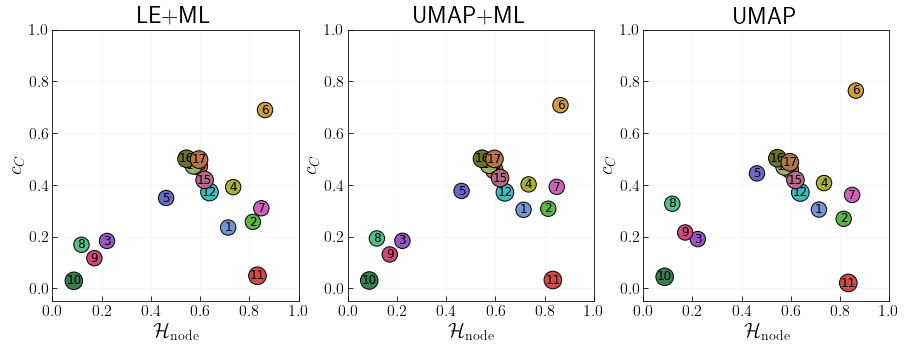

time: 517 ms (started: 2022-12-22 15:34:31 +01:00)


In [192]:
cc_le_ml = np.array([
    citeseer_cc_0_1['cc_le_ml'],
    cora_cc_0_1['cc_le_ml'],
    film_cc_0_1['cc_le_ml'],
    dblp_cc_0_1['cc_le_ml'],
    imdb_cc_0_1['cc_le_ml'],
    acm_cc_0_1['cc_le_ml'],
    amazon_photo_cc_0_1['cc_le_ml'],
    cornell_cc_0_1['cc_le_ml'],
    wisconsin_cc_0_1['cc_le_ml'],
    texas_cc_0_1['cc_le_ml'],
    lastfm_cc_0_1['cc_le_ml'],
    twitch_ru_cc_0_1['cc_le_ml'],
    twitch_ptbr_cc_0_1['cc_le_ml'],
    twitch_fr_cc_0_1['cc_le_ml'],
    twitch_es_cc_0_1['cc_le_ml'],
    twitch_engb_cc_0_1['cc_le_ml'],
    twitch_de_cc_0_1['cc_le_ml'],
])

cc_umap_ml = np.array([
    citeseer_cc_0_1['cc_umap_ml'],
    cora_cc_0_1['cc_umap_ml'],
    film_cc_0_1['cc_umap_ml'],
    dblp_cc_0_1['cc_umap_ml'],
    imdb_cc_0_1['cc_umap_ml'],
    acm_cc_0_1['cc_umap_ml'],
    amazon_photo_cc_0_1['cc_umap_ml'],
    cornell_cc_0_1['cc_umap_ml'],
    wisconsin_cc_0_1['cc_umap_ml'],
    texas_cc_0_1['cc_umap_ml'],
    lastfm_cc_0_1['cc_umap_ml'],
    twitch_ru_cc_0_1['cc_umap_ml'],
    twitch_ptbr_cc_0_1['cc_umap_ml'],
    twitch_fr_cc_0_1['cc_umap_ml'],
    twitch_es_cc_0_1['cc_umap_ml'],
    twitch_engb_cc_0_1['cc_umap_ml'],
    twitch_de_cc_0_1['cc_umap_ml'],
])

cc_only_umap = np.array([
    citeseer_cc_0_1['cc_only_umap'],
    cora_cc_0_1['cc_only_umap'],
    film_cc_0_1['cc_only_umap'],
    dblp_cc_0_1['cc_only_umap'],
    imdb_cc_0_1['cc_only_umap'],
    acm_cc_0_1['cc_only_umap'],
    amazon_photo_cc_0_1['cc_only_umap'],
    cornell_cc_0_1['cc_only_umap'],
    wisconsin_cc_0_1['cc_only_umap'],
    texas_cc_0_1['cc_only_umap'],
    lastfm_cc_0_1['cc_only_umap'],
    twitch_ru_cc_0_1['cc_only_umap'],
    twitch_ptbr_cc_0_1['cc_only_umap'],
    twitch_fr_cc_0_1['cc_only_umap'],
    twitch_es_cc_0_1['cc_only_umap'],
    twitch_engb_cc_0_1['cc_only_umap'],
    twitch_de_cc_0_1['cc_only_umap'],
])



def plot_cc_per_option(cc_res, col):
    datasets = list(range(1, 18))
    for gr, h, c, name in zip(cc_res, df_all[col], colors, datasets):
        plt.text(h, gr, name, ha="center", va="center",
                 bbox = dict(boxstyle=f"circle,pad=0.1", fc=c), fontsize=12, usetex=False)
    plt.ylim(-0.05, 1)
    plt.ylabel(r'$c_C$')
    

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plot_cc_per_option(cc_le_ml, 'H_node')
plt.xlabel(r'$\mathcal{H}_{\mathrm{node}}$')
plt.title('LE+ML')

plt.subplot(1, 3, 2)
plot_cc_per_option(cc_umap_ml, 'H_node')
plt.xlabel(r'$\mathcal{H}_{\mathrm{node}}$')
plt.title('UMAP+ML')

plt.subplot(1, 3, 3)
plot_cc_per_option(cc_only_umap, 'H_node')
plt.xlabel(r'$\mathcal{H}_{\mathrm{node}}$')
plt.title('UMAP')

# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/Report/homophily_10_datasets_tasks_comparison/plots/community_concentration_vs_homophily_f_relevance.pdf")

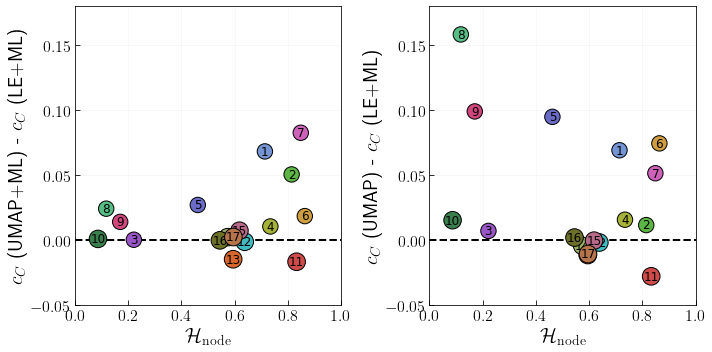

time: 326 ms (started: 2022-12-22 15:34:31 +01:00)


In [193]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plot_cc_per_option(cc_umap_ml - cc_le_ml, 'H_node')
plt.axhline(y=0, color='black', linestyle='--')
plt.ylim(-0.05, 0.18)
plt.ylabel(r'$c_C$ (UMAP+ML) - $c_C$ (LE+ML)')
plt.xlabel(r'$\mathcal{H}_{\mathrm{node}}$')

plt.subplot(1, 2, 2)
plot_cc_per_option(cc_only_umap - cc_le_ml, 'H_node')
plt.axhline(y=0, color='black', linestyle='--')
plt.ylim(-0.05, 0.18)
plt.ylabel(r'$c_C$ (UMAP) - $c_C$ (LE+ML)')
plt.xlabel(r'$\mathcal{H}_{\mathrm{node}}$')

plt.tight_layout()

# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/Report/homophily_10_datasets_tasks_comparison/plots/community_concentration_difference_vs_homophily_f_relevance.pdf")

## Link prediction

In [26]:
import scipy.sparse as sp
from sklearn.metrics import roc_auc_score, average_precision_score


def read_beta_and_mu(path):
    with open(path, 'r') as f:
        for line in f:
            if '- beta' in line:
                beta = float(line.split()[-1])
            elif '- mu' in line:
                mu = float(line.split()[-1])
        return beta, mu
    

def mask_edges(g, test_prop, val_prop, seed):
    adj = nx.adjacency_matrix(g)
    
    np.random.seed(seed)  # get tp edges
    x, y = sp.triu(adj).nonzero()
    pos_edges = np.array(list(zip(x, y)))
    np.random.shuffle(pos_edges)

    # get tn edges
    x, y = sp.triu(sp.csr_matrix(1. - adj.toarray())).nonzero()
    neg_edges = np.array(list(zip(x, y)))
    np.random.shuffle(neg_edges)

    m_pos = len(pos_edges)
    n_val = int(m_pos * val_prop)
    n_test = int(m_pos * test_prop)
    val_edges, test_edges, train_edges = pos_edges[:n_val], pos_edges[n_val:n_test + n_val], pos_edges[n_test + n_val:]
    val_edges_false, test_edges_false = neg_edges[:n_val], neg_edges[n_val:n_test + n_val]
    train_edges_false = np.concatenate([neg_edges, val_edges, test_edges], axis=0)
    
    # Remap the edges to the original names
    nodes = list(g.nodes())
    test_edges_names = []
    test_edges_false_names = []
    
    for s, t in test_edges:
        test_edges_names.append((nodes[s], nodes[t]))
    for s, t in test_edges_false:
        test_edges_false_names.append((nodes[s], nodes[t]))
    
    
    return {
        #'train_edges': train_edges, 
        #'train_edges_false': train_edges_false, 
        #'val_edges': val_edges, 
        #'val_edges_false': val_edges_false, 
        'test_edges': test_edges_names,
        'test_edges_false': test_edges_false_names
    }


def compute_link_probability(edges, df, beta, mu):
    R = np.sqrt(df["p1"][0]**2 + df["p2"][0]**2 + df["p3"][0]**2)    
    probs = []
    for i, j in tqdm(edges):
        df_i = df[df['index'].astype(str) == i]
        df_j = df[df['index'].astype(str) == j]

        kappa_i = df_i['kappa'].values[0]
        kappa_j = df_j['kappa'].values[0]
        
        p1 = df_i[['p1', 'p2', 'p3']].values[0]
        p2 = df_j[['p1', 'p2', 'p3']].values[0]
        angle = np.arccos(np.clip(np.dot(p1, p2) / (np.linalg.norm(p2) * np.linalg.norm(p1)), -1, 1))
        probs.append(1 / (1 + np.power((R * angle) / np.sqrt(mu * kappa_i * kappa_j), beta))) # D=2
        
    return probs


def compute_lp_metrics(g, df, beta, mu, test_prop=0.1, val_prop=0, seed=42):
    data = mask_edges(g, test_prop, val_prop, seed)
    
    pos_scores = compute_link_probability(data['test_edges'], df, beta, mu)
    neg_scores = compute_link_probability(data['test_edges_false'], df, beta, mu)

    labels = [1] * len(pos_scores) + [0] * len(neg_scores)
    preds = pos_scores + neg_scores

    roc = roc_auc_score(labels, preds)
    ap = average_precision_score(labels, preds)
    return {'roc': roc, 'ap': ap}


def link_prediction(g, df_le_ml, df_umap_ml, df_only_umap, beta_le_ml, beta_umap_ml, beta_only_umap,
                    mu_le_ml, mu_umap_ml, mu_only_umap):
    
    lp_le_ml = compute_lp_metrics(g, df_le_ml, beta_le_ml, mu_le_ml)
    lp_umap_ml = compute_lp_metrics(g, df_umap_ml, beta_umap_ml, mu_umap_ml)
    lp_only_umap = compute_lp_metrics(g, df_only_umap, beta_only_umap, mu_only_umap)

    return {
        'roc_le_ml': lp_le_ml['roc'],
        'roc_umap_ml': lp_umap_ml['roc'],
        'roc_only_umap': lp_only_umap['roc'],
        'ap_le_ml': lp_le_ml['ap'],
        'ap_umap_ml': lp_umap_ml['ap'],
        'ap_only_umap': lp_only_umap['ap'],
    }

time: 44.2 ms (started: 2022-12-21 10:50:33 +01:00)


In [131]:
base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/citeseer/umap/"
beta_le_ml, mu_le_ml = read_beta_and_mu(f"{base_path}/le_ml/citeseer_GC_fixed.inf_coord")
beta_umap_ml, mu_umap_ml = read_beta_and_mu(f"{base_path}/umap_ml/citeseer_GC_fixed.inf_coord")
beta_only_umap, mu_only_umap = read_beta_and_mu(f"{base_path}/only_umap/citeseer_GC_fixed.inf_coord")

citeseer_lp = link_prediction(citeseer_graph, citeseer_le_ml, citeseer_umap_ml, citeseer_only_umap,
                              beta_le_ml, beta_umap_ml, beta_only_umap, mu_le_ml, mu_umap_ml, mu_only_umap)

/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 366/366 [00:00<00:00, 733.72it/s]
/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 366/366 [00:00<00:00, 731.39it/s]
/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 366/366 [00:00<00:00, 732.38it/s]

time: 10.6 s (started: 2022-12-19 09:02:03 +01:00)


In [132]:
base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/cora/umap/"
beta_le_ml, mu_le_ml = read_beta_and_mu(f"{base_path}/le_ml/cora_GC.inf_coord")
beta_umap_ml, mu_umap_ml = read_beta_and_mu(f"{base_path}/umap_ml/cora_GC.inf_coord")
beta_only_umap, mu_only_umap = read_beta_and_mu(f"{base_path}/only_umap/cora_GC.inf_coord")

cora_lp = link_prediction(cora_graph, cora_le_ml, cora_umap_ml, cora_only_umap,
                          beta_le_ml, beta_umap_ml, beta_only_umap, mu_le_ml, mu_umap_ml, mu_only_umap)

/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 506/506 [00:01<00:00, 410.53it/s]
/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 506/506 [00:01<00:00, 412.52it/s]
/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 506/506 [00:01<00:00, 405.98it/s]

time: 18 s (started: 2022-12-19 09:02:14 +01:00)


In [133]:
base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/film/umap/"
beta_le_ml, mu_le_ml = read_beta_and_mu(f"{base_path}/le_ml/out1_graph_edges.inf_coord")
beta_umap_ml, mu_umap_ml = read_beta_and_mu(f"{base_path}/umap_ml/out1_graph_edges.inf_coord")
beta_only_umap, mu_only_umap = read_beta_and_mu(f"{base_path}/only_umap/out1_graph_edges.inf_coord")

film_lp = link_prediction(film_graph, film_le_ml, film_umap_ml, film_only_umap,
                          beta_le_ml, beta_umap_ml, beta_only_umap, mu_le_ml, mu_umap_ml, mu_only_umap)

/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 2675/2675 [00:13<00:00, 205.66it/s]
/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 2675/2675 [00:13<00:00, 204.20it/s]
/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 2675/2675 [00:13<00:00, 203.89it/s]

time: 3min 18s (started: 2022-12-19 09:02:32 +01:00)


In [134]:
base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/dblp/umap/"
beta_le_ml, mu_le_ml = read_beta_and_mu(f"{base_path}/le_ml/dblp_pprefp_GC.inf_coord")
beta_umap_ml, mu_umap_ml = read_beta_and_mu(f"{base_path}/umap_ml/dblp_pprefp_GC.inf_coord")
beta_only_umap, mu_only_umap = read_beta_and_mu(f"{base_path}/only_umap/dblp_pprefp_GC.inf_coord")

dblp_lp = link_prediction(dblp_graph, dblp_le_ml, dblp_umap_ml, dblp_only_umap,
                          beta_le_ml, beta_umap_ml, beta_only_umap, mu_le_ml, mu_umap_ml, mu_only_umap)

/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 4288/4288 [00:10<00:00, 405.28it/s]
/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 4288/4288 [00:10<00:00, 398.89it/s]
/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 4288/4288 [00:10<00:00, 402.27it/s]

time: 1min 18s (started: 2022-12-19 09:05:50 +01:00)


In [135]:
base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/imdb/umap/"
beta_le_ml, mu_le_ml = read_beta_and_mu(f"{base_path}/le_ml/imdb_mam_GC.inf_coord")
beta_umap_ml, mu_umap_ml = read_beta_and_mu(f"{base_path}/umap_ml/imdb_mam_GC.inf_coord")
beta_only_umap, mu_only_umap = read_beta_and_mu(f"{base_path}/only_umap/imdb_mam_GC.inf_coord")

imdb_lp = link_prediction(imdb_graph, imdb_le_ml, imdb_umap_ml, imdb_only_umap,
                          beta_le_ml, beta_umap_ml, beta_only_umap, mu_le_ml, mu_umap_ml, mu_only_umap)

/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 3140/3140 [00:08<00:00, 361.66it/s]
/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 3140/3140 [00:08<00:00, 365.21it/s]
/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 3140/3140 [00:08<00:00, 363.62it/s]

time: 1min 14s (started: 2022-12-19 09:07:09 +01:00)


In [136]:
base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/acm/umap/"
beta_le_ml, mu_le_ml = read_beta_and_mu(f"{base_path}/le_ml/acm_pap_GC.inf_coord")
beta_umap_ml, mu_umap_ml = read_beta_and_mu(f"{base_path}/umap_ml/acm_pap_GC.inf_coord")
beta_only_umap, mu_only_umap = read_beta_and_mu(f"{base_path}/only_umap/acm_pap_GC.inf_coord")

acm_lp = link_prediction(acm_graph, acm_le_ml, acm_umap_ml, acm_only_umap,
                         beta_le_ml, beta_umap_ml, beta_only_umap, mu_le_ml, mu_umap_ml, mu_only_umap)

/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 1262/1262 [00:02<00:00, 463.20it/s]
/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
  8%|▊         | 96/1262 [00:00<00:02, 475.92it/s]/tmp/ipykernel_3410803/3954130863.py:69: RuntimeWarning: overflow encountered in power
  probs.append(1 / (1 + np.power((R * angle) / np.sqrt(mu * kappa_i * kappa_j), beta))) # D=2
 15%|█▌        | 192/1262 [00:00<00:02, 460.36it/s]/tmp/ipykernel_3410803/3954130863.py:69: RuntimeWarning: overflow encountered in power
  probs.append(1 / (1 + np.power((R * angle) / np.sqrt(mu * kappa_i * kappa_j), beta))) # D=2
 19%|█▉        | 239/1262 [00:00<00:02, 452.49it/s]/tmp/ipykernel_3410803/3954130863.py:69: RuntimeWarning: overflow encountered in powe

time: 23.7 s (started: 2022-12-19 09:08:24 +01:00)


In [137]:
base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/amazon_photo/umap/"
beta_le_ml, mu_le_ml = read_beta_and_mu(f"{base_path}/le_ml/amazon_photo_GC.inf_coord")
beta_umap_ml, mu_umap_ml = read_beta_and_mu(f"{base_path}/umap_ml/amazon_photo_GC.inf_coord")
beta_only_umap, mu_only_umap = read_beta_and_mu(f"{base_path}/only_umap/amazon_photo_GC.inf_coord")

amazon_photo_lp = link_prediction(amazon_photo_graph, amazon_photo_le_ml, amazon_photo_umap_ml, amazon_photo_only_umap,
                                  beta_le_ml, beta_umap_ml, beta_only_umap, mu_le_ml, mu_umap_ml, mu_only_umap)

/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 11904/11904 [00:57<00:00, 208.18it/s]
/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 11904/11904 [00:57<00:00, 208.23it/s]
/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 11904/11904 [00:57<00:00, 208.81it/s]

time: 7min 47s (started: 2022-12-19 09:08:48 +01:00)


In [138]:
base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/cornell/umap/"
beta_le_ml, mu_le_ml = read_beta_and_mu(f"{base_path}/le_ml/out1_graph_edges.inf_coord")
beta_umap_ml, mu_umap_ml = read_beta_and_mu(f"{base_path}/umap_ml/out1_graph_edges.inf_coord")
beta_only_umap, mu_only_umap = read_beta_and_mu(f"{base_path}/only_umap/out1_graph_edges.inf_coord")

cornell_lp = link_prediction(cornell_graph, cornell_le_ml, cornell_umap_ml, cornell_only_umap,
                             beta_le_ml, beta_umap_ml, beta_only_umap, mu_le_ml, mu_umap_ml, mu_only_umap)

/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 28/28 [00:00<00:00, 778.22it/s]
/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 28/28 [00:00<00:00, 790.57it/s]
/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 28/28 [00:00<00:00, 811.18it/s]

time: 309 ms (started: 2022-12-19 09:16:35 +01:00)


In [139]:
base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/wisconsin/umap/"
beta_le_ml, mu_le_ml = read_beta_and_mu(f"{base_path}/le_ml/out1_graph_edges.inf_coord")
beta_umap_ml, mu_umap_ml = read_beta_and_mu(f"{base_path}/umap_ml/out1_graph_edges.inf_coord")
beta_only_umap, mu_only_umap = read_beta_and_mu(f"{base_path}/only_umap/out1_graph_edges.inf_coord")

wisconsin_lp = link_prediction(wisconsin_graph, wisconsin_le_ml, wisconsin_umap_ml, wisconsin_only_umap,
                               beta_le_ml, beta_umap_ml, beta_only_umap, mu_le_ml, mu_umap_ml, mu_only_umap)

/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 46/46 [00:00<00:00, 789.91it/s]
/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 46/46 [00:00<00:00, 784.29it/s]
/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 46/46 [00:00<00:00, 813.32it/s]

time: 530 ms (started: 2022-12-19 09:16:35 +01:00)


In [140]:
base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/texas/umap/"
beta_le_ml, mu_le_ml = read_beta_and_mu(f"{base_path}/le_ml/out1_graph_edges.inf_coord")
beta_umap_ml, mu_umap_ml = read_beta_and_mu(f"{base_path}/umap_ml/out1_graph_edges.inf_coord")
beta_only_umap, mu_only_umap = read_beta_and_mu(f"{base_path}/only_umap/out1_graph_edges.inf_coord")

texas_lp = link_prediction(texas_graph, texas_le_ml, texas_umap_ml, texas_only_umap,
                           beta_le_ml, beta_umap_ml, beta_only_umap, mu_le_ml, mu_umap_ml, mu_only_umap)

/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 29/29 [00:00<00:00, 836.50it/s]
/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 29/29 [00:00<00:00, 660.52it/s]
/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 29/29 [00:00<00:00, 683.80it/s]

time: 356 ms (started: 2022-12-19 09:16:36 +01:00)


In [141]:
base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/lastfm_asia/umap/"
beta_le_ml, mu_le_ml = read_beta_and_mu(f"{base_path}/le_ml/lastfm_asia_edges.inf_coord")
beta_umap_ml, mu_umap_ml = read_beta_and_mu(f"{base_path}/umap_ml/lastfm_asia_edges.inf_coord")
beta_only_umap, mu_only_umap = read_beta_and_mu(f"{base_path}/only_umap/lastfm_asia_edges.inf_coord")

lastfm_lp = link_prediction(lastfm_graph, lastfm_le_ml, lastfm_umap_ml, lastfm_only_umap,
                            beta_le_ml, beta_umap_ml, beta_only_umap, mu_le_ml, mu_umap_ml, mu_only_umap)

/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 2780/2780 [00:13<00:00, 200.83it/s]
/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 2780/2780 [00:13<00:00, 200.39it/s]
/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 2780/2780 [00:13<00:00, 200.09it/s]

time: 3min 29s (started: 2022-12-19 09:16:36 +01:00)


In [142]:
base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/RU/umap/"
beta_le_ml, mu_le_ml = read_beta_and_mu(f"{base_path}/le_ml/musae_RU_edges.inf_coord")
beta_umap_ml, mu_umap_ml = read_beta_and_mu(f"{base_path}/umap_ml/musae_RU_edges.inf_coord")
beta_only_umap, mu_only_umap = read_beta_and_mu(f"{base_path}/only_umap/musae_RU_edges.inf_coord")

twitch_ru_lp = link_prediction(twitch_ru_graph, twitch_ru_le_ml, twitch_ru_umap_ml, twitch_ru_only_umap,
                               beta_le_ml, beta_umap_ml, beta_only_umap, mu_le_ml, mu_umap_ml, mu_only_umap)

/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 3730/3730 [00:12<00:00, 299.84it/s]
/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 3730/3730 [00:12<00:00, 299.59it/s]
/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 3730/3730 [00:12<00:00, 297.85it/s]

time: 2min (started: 2022-12-19 09:20:06 +01:00)


In [143]:
base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/PTBR/umap/"
beta_le_ml, mu_le_ml = read_beta_and_mu(f"{base_path}/le_ml/musae_PTBR_edges.inf_coord")
beta_umap_ml, mu_umap_ml = read_beta_and_mu(f"{base_path}/umap_ml/musae_PTBR_edges.inf_coord")
beta_only_umap, mu_only_umap = read_beta_and_mu(f"{base_path}/only_umap/musae_PTBR_edges.inf_coord")

twitch_ptbr_lp = link_prediction(twitch_ptbr_graph, twitch_ptbr_le_ml, twitch_ptbr_umap_ml, twitch_ptbr_only_umap,
                                 beta_le_ml, beta_umap_ml, beta_only_umap, mu_le_ml, mu_umap_ml, mu_only_umap)

/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 3129/3129 [00:06<00:00, 475.28it/s]
/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 3129/3129 [00:06<00:00, 473.71it/s]
/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 3129/3129 [00:06<00:00, 478.83it/s]

time: 46.2 s (started: 2022-12-19 09:22:07 +01:00)


In [144]:
base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/FR/umap/"
beta_le_ml, mu_le_ml = read_beta_and_mu(f"{base_path}/le_ml/musae_FR_edges.inf_coord")
beta_umap_ml, mu_umap_ml = read_beta_and_mu(f"{base_path}/umap_ml/musae_FR_edges.inf_coord")
beta_only_umap, mu_only_umap = read_beta_and_mu(f"{base_path}/only_umap/musae_FR_edges.inf_coord")

twitch_fr_lp = link_prediction(twitch_fr_graph, twitch_fr_le_ml, twitch_fr_umap_ml, twitch_fr_only_umap,
                               beta_le_ml, beta_umap_ml, beta_only_umap, mu_le_ml, mu_umap_ml, mu_only_umap)

/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 11266/11266 [00:49<00:00, 226.38it/s]
/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 11266/11266 [00:49<00:00, 227.67it/s]
/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 11266/11266 [00:49<00:00, 228.00it/s]

time: 6min 35s (started: 2022-12-19 09:22:53 +01:00)


In [145]:
base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/ES/umap/"
beta_le_ml, mu_le_ml = read_beta_and_mu(f"{base_path}/le_ml/musae_ES_edges.inf_coord")
beta_umap_ml, mu_umap_ml = read_beta_and_mu(f"{base_path}/umap_ml/musae_ES_edges.inf_coord")
beta_only_umap, mu_only_umap = read_beta_and_mu(f"{base_path}/only_umap/musae_ES_edges.inf_coord")

twitch_es_lp = link_prediction(twitch_es_graph, twitch_es_le_ml, twitch_es_umap_ml, twitch_es_only_umap,
                               beta_le_ml, beta_umap_ml, beta_only_umap, mu_le_ml, mu_umap_ml, mu_only_umap)

/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 5938/5938 [00:20<00:00, 290.38it/s]
/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 5938/5938 [00:20<00:00, 289.83it/s]
/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 5938/5938 [00:20<00:00, 289.56it/s]

time: 2min 53s (started: 2022-12-19 09:29:29 +01:00)


In [146]:
base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/ENGB/umap/"
beta_le_ml, mu_le_ml = read_beta_and_mu(f"{base_path}/le_ml/musae_ENGB_edges.inf_coord")
beta_umap_ml, mu_umap_ml = read_beta_and_mu(f"{base_path}/umap_ml/musae_ENGB_edges.inf_coord")
beta_only_umap, mu_only_umap = read_beta_and_mu(f"{base_path}/only_umap/musae_ENGB_edges.inf_coord")

twitch_engb_lp = link_prediction(twitch_engb_graph, twitch_engb_le_ml, twitch_engb_umap_ml, twitch_engb_only_umap,
                                 beta_le_ml, beta_umap_ml, beta_only_umap, mu_le_ml, mu_umap_ml, mu_only_umap)

/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 3532/3532 [00:16<00:00, 211.83it/s]
/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 3532/3532 [00:16<00:00, 210.02it/s]
/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 3532/3532 [00:16<00:00, 210.44it/s]

time: 3min 31s (started: 2022-12-19 09:32:23 +01:00)


In [147]:
base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/DE/umap/"
beta_le_ml, mu_le_ml = read_beta_and_mu(f"{base_path}/le_ml/musae_DE_edges.inf_coord")
beta_umap_ml, mu_umap_ml = read_beta_and_mu(f"{base_path}/umap_ml/musae_DE_edges.inf_coord")
beta_only_umap, mu_only_umap = read_beta_and_mu(f"{base_path}/only_umap/musae_DE_edges.inf_coord")

twitch_de_lp = link_prediction(twitch_de_graph, twitch_de_le_ml, twitch_de_umap_ml, twitch_de_only_umap,
                               beta_le_ml, beta_umap_ml, beta_only_umap, mu_le_ml, mu_umap_ml, mu_only_umap)

/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 15313/15313 [01:25<00:00, 178.12it/s]
/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 15313/15313 [01:25<00:00, 178.93it/s]
/tmp/ipykernel_3410803/3954130863.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)
100%|██████████| 15313/15313 [01:25<00:00, 179.19it/s]

time: 16min 38s (started: 2022-12-19 09:35:55 +01:00)


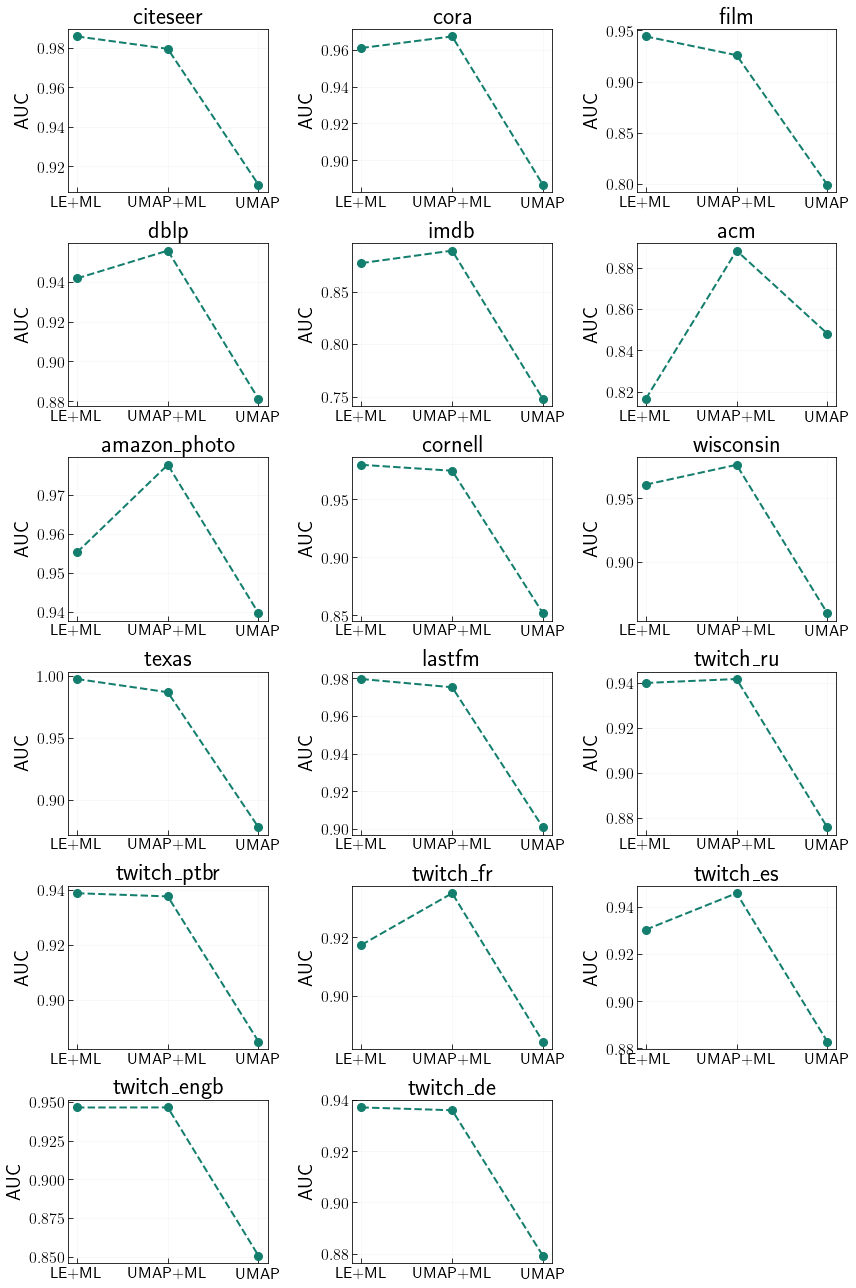

time: 1.22 s (started: 2022-12-19 09:56:46 +01:00)


In [151]:
def plot_lp_per_dataset(lp, title):
    plt.plot([lp['roc_le_ml'], lp['roc_umap_ml'], lp['roc_only_umap']], 
             color='xkcd:blue green', marker='o', linestyle='--')
    plt.xticks([0, 1, 2], ['LE+ML', 'UMAP+ML', 'UMAP'])
    plt.ylabel('AUC')
    plt.title(title)
    
plt.figure(figsize=(12, 18))
plt.subplot(6, 3, 1)
plot_lp_per_dataset(citeseer_lp, 'citeseer')
plt.subplot(6, 3, 2)
plot_lp_per_dataset(cora_lp, 'cora')
plt.subplot(6, 3, 3)
plot_lp_per_dataset(film_lp, 'film')
plt.subplot(6, 3, 4)
plot_lp_per_dataset(dblp_lp, 'dblp')
plt.subplot(6, 3, 5)
plot_lp_per_dataset(imdb_lp, 'imdb')
plt.subplot(6, 3, 6)
plot_lp_per_dataset(acm_lp, 'acm')
plt.subplot(6, 3, 7)
plot_lp_per_dataset(amazon_photo_lp, 'amazon_photo')
plt.subplot(6, 3, 8)
plot_lp_per_dataset(cornell_lp, 'cornell')
plt.subplot(6, 3, 9)
plot_lp_per_dataset(wisconsin_lp, 'wisconsin')
plt.subplot(6, 3, 10)
plot_lp_per_dataset(texas_lp, 'texas')
plt.subplot(6, 3, 11)
plot_lp_per_dataset(lastfm_lp, 'lastfm')
plt.subplot(6, 3, 12)
plot_lp_per_dataset(twitch_ru_lp, 'twitch_ru')
plt.subplot(6, 3, 13)
plot_lp_per_dataset(twitch_ptbr_lp, 'twitch_ptbr')
plt.subplot(6, 3, 14)
plot_lp_per_dataset(twitch_fr_lp, 'twitch_fr')
plt.subplot(6, 3, 15)
plot_lp_per_dataset(twitch_es_lp, 'twitch_es')
plt.subplot(6, 3, 16)
plot_lp_per_dataset(twitch_engb_lp, 'twitch_engb')
plt.subplot(6, 3, 17)
plot_lp_per_dataset(twitch_de_lp, 'twitch_de')

plt.tight_layout()
# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/Report/homophily_10_datasets_tasks_comparison/plots/link_prediction_comparison.pdf")

Text(0.5, 1.0, 'UMAP')

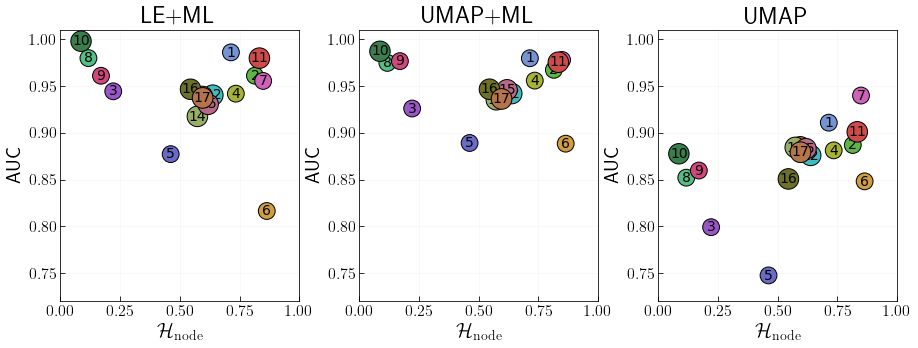

time: 309 ms (started: 2022-12-19 09:57:05 +01:00)


In [152]:
lp_le_ml = np.array([
    citeseer_lp['roc_le_ml'],
    cora_lp['roc_le_ml'],
    film_lp['roc_le_ml'],
    dblp_lp['roc_le_ml'],
    imdb_lp['roc_le_ml'],
    acm_lp['roc_le_ml'],
    amazon_photo_lp['roc_le_ml'],
    cornell_lp['roc_le_ml'],
    wisconsin_lp['roc_le_ml'],
    texas_lp['roc_le_ml'],
    lastfm_lp['roc_le_ml'],
    twitch_ru_lp['roc_le_ml'],
    twitch_ptbr_lp['roc_le_ml'],
    twitch_fr_lp['roc_le_ml'],
    twitch_es_lp['roc_le_ml'],
    twitch_engb_lp['roc_le_ml'],
    twitch_de_lp['roc_le_ml']
])

lp_umap_ml = np.array([
    citeseer_lp['roc_umap_ml'],
    cora_lp['roc_umap_ml'],
    film_lp['roc_umap_ml'],
    dblp_lp['roc_umap_ml'],
    imdb_lp['roc_umap_ml'],
    acm_lp['roc_umap_ml'],
    amazon_photo_lp['roc_umap_ml'],
    cornell_lp['roc_umap_ml'],
    wisconsin_lp['roc_umap_ml'],
    texas_lp['roc_umap_ml'],
    lastfm_lp['roc_umap_ml'],
    twitch_ru_lp['roc_umap_ml'],
    twitch_ptbr_lp['roc_umap_ml'],
    twitch_fr_lp['roc_umap_ml'],
    twitch_es_lp['roc_umap_ml'],
    twitch_engb_lp['roc_umap_ml'],
    twitch_de_lp['roc_umap_ml']
])

lp_only_umap = np.array([
    citeseer_lp['roc_only_umap'],
    cora_lp['roc_only_umap'],
    film_lp['roc_only_umap'],
    dblp_lp['roc_only_umap'],
    imdb_lp['roc_only_umap'],
    acm_lp['roc_only_umap'],
    amazon_photo_lp['roc_only_umap'],
    cornell_lp['roc_only_umap'],
    wisconsin_lp['roc_only_umap'],
    texas_lp['roc_only_umap'],
    lastfm_lp['roc_only_umap'],
    twitch_ru_lp['roc_only_umap'],
    twitch_ptbr_lp['roc_only_umap'],
    twitch_fr_lp['roc_only_umap'],
    twitch_es_lp['roc_only_umap'],
    twitch_engb_lp['roc_only_umap'],
    twitch_de_lp['roc_only_umap']
])


def plot_auc_per_option(lp_res, col):
    datasets = list(range(1, 18))
    for gr, h, c, name in zip(lp_res, df_all[col], colors, datasets):
        plt.text(h, gr, name, ha="center", va="center",
                 bbox = dict(boxstyle=f"circle,pad=0.1", fc=c), fontsize=14, usetex=False)
    plt.ylim(0.72, 1.01)
    plt.ylabel('AUC')

plt.figure(figsize=(15, 5))
plt.subplots_adjust(wspace=0.25)
plt.subplot(1, 3, 1)
plot_auc_per_option(lp_le_ml, 'H_node')
plt.xlabel(r'$\mathcal{H}_{\mathrm{node}}$')    
plt.title('LE+ML')

plt.subplot(1, 3, 2)
plot_auc_per_option(lp_umap_ml, 'H_node')
plt.xlabel(r'$\mathcal{H}_{\mathrm{node}}$')
plt.title('UMAP+ML')

plt.subplot(1, 3, 3)
plot_auc_per_option(lp_only_umap, 'H_node')
plt.xlabel(r'$\mathcal{H}_{\mathrm{node}}$')
plt.title('UMAP')

# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/Report/homophily_10_datasets_tasks_comparison/plots/link_prediction_vs_homophily_f_relevance.pdf")

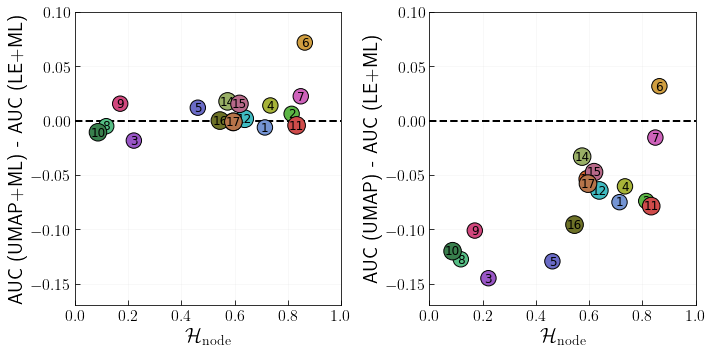

time: 259 ms (started: 2022-12-19 09:57:08 +01:00)


In [153]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plot_cc_per_option(lp_umap_ml - lp_le_ml, 'H_node')
plt.axhline(y=0, color='black', linestyle='--')
plt.ylim(-0.17, 0.1)
plt.xlabel(r'$\mathcal{H}_{\mathrm{node}}$')
plt.ylabel(r'AUC (UMAP+ML) - AUC (LE+ML)')

plt.subplot(1, 2, 2)
plot_cc_per_option(lp_only_umap - lp_le_ml, 'H_node')
plt.axhline(y=0, color='black', linestyle='--')
plt.ylim(-0.17, 0.1)
plt.xlabel(r'$\mathcal{H}_{\mathrm{node}}$')
plt.ylabel(r'AUC (UMAP) - AUC (LE+ML)')


plt.tight_layout()

# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/Report/homophily_10_datasets_tasks_comparison/plots/link_prediction_difference_vs_homophily_f_relevance.pdf")

## Link prediction -- precision curve (from complete graphs)

In [119]:
from generate_incomplete_graph import *
from compute_precision_vs_missing_links import *
from numba import jit


@jit(nopython=True)
def fast_score_matrix(pos, kappas, beta, mu, R):
    score = np.zeros((len(kappas), len(kappas)))
    for i in range(len(pos)):
        for j in range(i):
            p1, p2 = pos[i], pos[j]
            angle = np.arccos(np.dot(p1, p2) / (np.linalg.norm(p2) * np.linalg.norm(p1)))
            if np.isnan(angle):
                angle = 0
            score[i, j] = 1 / (1 + np.power((R * angle) / np.sqrt(mu * kappas[i] * kappas[j]), beta))
            score[j, i] = score[i, j]
    return score


def compute_score_matrix(g, df, beta, mu):
    nodes_order = list(g.nodes())
    df['index'] = df['index'].astype(str)
    df = df.set_index('index')
    df = df.loc[nodes_order]
    
    pos = df[['p1', 'p2', 'p3']].values
    R = np.mean(np.linalg.norm(pos, axis=1))
    kappas = df['kappa'].values
    return fast_score_matrix(pos, kappas, beta, mu, R)


def compute_precision_curve_complete_graph(qs, df, complete_graph, beta, mu, ntimes=5):
    score = compute_score_matrix(complete_graph, df, beta, mu)
    precisions = []
    for q in tqdm(qs):
        p_mean = []
        for _ in range(ntimes):
            train_graph = generate_incomplete_network(complete_graph, q0=q, check_gcc=False)
            ET = nx.to_numpy_matrix(train_graph)
            EP = nx.to_numpy_matrix(complete_graph) - ET
            L = int(q * nx.number_of_edges(complete_graph))
            p = compute_precision(ET, EP, L, score)
            p_mean.append(p)
        precisions.append(np.mean(p_mean))
    return precisions


qs = np.linspace(0.01, 0.8, num=10)

time: 4.57 ms (started: 2022-12-21 15:14:40 +01:00)


In [120]:
base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/citeseer/umap/"
beta_le_ml, mu_le_ml = read_beta_and_mu(f"{base_path}/le_ml/citeseer_GC_fixed.inf_coord")
beta_umap_ml, mu_umap_ml = read_beta_and_mu(f"{base_path}/umap_ml/citeseer_GC_fixed.inf_coord")
beta_only_umap, mu_only_umap = read_beta_and_mu(f"{base_path}/only_umap/citeseer_GC_fixed.inf_coord")

citeseer_le_ml_pr = compute_precision_curve_complete_graph(qs, citeseer_le_ml, citeseer_graph, beta_le_ml, mu_le_ml)
citeseer_umap_ml_pr = compute_precision_curve_complete_graph(qs, citeseer_umap_ml, citeseer_graph, beta_umap_ml, mu_umap_ml)
citeseer_only_umap_pr = compute_precision_curve_complete_graph(qs, citeseer_only_umap, citeseer_graph, beta_only_umap, mu_only_umap)

100%|██████████| 10/10 [01:12<00:00,  7.24s/it]

time: 3min 37s (started: 2022-12-21 15:14:46 +01:00)


In [121]:
base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/cora/umap/"
beta_le_ml, mu_le_ml = read_beta_and_mu(f"{base_path}/le_ml/cora_GC.inf_coord")
beta_umap_ml, mu_umap_ml = read_beta_and_mu(f"{base_path}/umap_ml/cora_GC.inf_coord")
beta_only_umap, mu_only_umap = read_beta_and_mu(f"{base_path}/only_umap/cora_GC.inf_coord")

cora_le_ml_pr = compute_precision_curve_complete_graph(qs, cora_le_ml, cora_graph, beta_le_ml, mu_le_ml)
cora_umap_ml_pr = compute_precision_curve_complete_graph(qs, cora_umap_ml, cora_graph, beta_umap_ml, mu_umap_ml)
cora_only_umap_pr = compute_precision_curve_complete_graph(qs, cora_only_umap, cora_graph, beta_only_umap, mu_only_umap)

100%|██████████| 10/10 [01:38<00:00,  9.86s/it]

time: 4min 59s (started: 2022-12-21 15:18:23 +01:00)


In [122]:
base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/film/umap/"
beta_le_ml, mu_le_ml = read_beta_and_mu(f"{base_path}/le_ml/out1_graph_edges.inf_coord")
beta_umap_ml, mu_umap_ml = read_beta_and_mu(f"{base_path}/umap_ml/out1_graph_edges.inf_coord")
beta_only_umap, mu_only_umap = read_beta_and_mu(f"{base_path}/only_umap/out1_graph_edges.inf_coord")

film_le_ml_pr = compute_precision_curve_complete_graph(qs, film_le_ml, film_graph, beta_le_ml, mu_le_ml)
film_umap_ml_pr = compute_precision_curve_complete_graph(qs, film_umap_ml, film_graph, beta_umap_ml, mu_umap_ml)
film_only_umap_pr = compute_precision_curve_complete_graph(qs, film_only_umap, film_graph, beta_only_umap, mu_only_umap)

100%|██████████| 10/10 [22:28<00:00, 134.88s/it]

time: 1h 8min 46s (started: 2022-12-21 15:23:23 +01:00)


In [123]:
base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/dblp/umap/"
beta_le_ml, mu_le_ml = read_beta_and_mu(f"{base_path}/le_ml/dblp_pprefp_GC.inf_coord")
beta_umap_ml, mu_umap_ml = read_beta_and_mu(f"{base_path}/umap_ml/dblp_pprefp_GC.inf_coord")
beta_only_umap, mu_only_umap = read_beta_and_mu(f"{base_path}/only_umap/dblp_pprefp_GC.inf_coord")

dblp_le_ml_pr = compute_precision_curve_complete_graph(qs, dblp_le_ml, dblp_graph, beta_le_ml, mu_le_ml)
dblp_umap_ml_pr = compute_precision_curve_complete_graph(qs, dblp_umap_ml, dblp_graph, beta_umap_ml, mu_umap_ml)
dblp_only_umap_pr = compute_precision_curve_complete_graph(qs, dblp_only_umap, dblp_graph, beta_only_umap, mu_only_umap)

100%|██████████| 10/10 [02:04<00:00, 12.42s/it]

time: 6min 18s (started: 2022-12-21 16:32:09 +01:00)


In [124]:
base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/imdb/umap/"
beta_le_ml, mu_le_ml = read_beta_and_mu(f"{base_path}/le_ml/imdb_mam_GC.inf_coord")
beta_umap_ml, mu_umap_ml = read_beta_and_mu(f"{base_path}/umap_ml/imdb_mam_GC.inf_coord")
beta_only_umap, mu_only_umap = read_beta_and_mu(f"{base_path}/only_umap/imdb_mam_GC.inf_coord")

imdb_le_ml_pr = compute_precision_curve_complete_graph(qs, imdb_le_ml, imdb_graph, beta_le_ml, mu_le_ml)
imdb_umap_ml_pr = compute_precision_curve_complete_graph(qs, imdb_umap_ml, imdb_graph, beta_umap_ml, mu_umap_ml)
imdb_only_umap_pr = compute_precision_curve_complete_graph(qs, imdb_only_umap, imdb_graph, beta_only_umap, mu_only_umap)

100%|██████████| 10/10 [03:51<00:00, 23.10s/it]

time: 11min 34s (started: 2022-12-21 16:38:28 +01:00)


In [125]:
base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/acm/umap/"
beta_le_ml, mu_le_ml = read_beta_and_mu(f"{base_path}/le_ml/acm_pap_GC.inf_coord")
beta_umap_ml, mu_umap_ml = read_beta_and_mu(f"{base_path}/umap_ml/acm_pap_GC.inf_coord")
beta_only_umap, mu_only_umap = read_beta_and_mu(f"{base_path}/only_umap/acm_pap_GC.inf_coord")

acm_le_ml_pr = compute_precision_curve_complete_graph(qs, acm_le_ml, acm_graph, beta_le_ml, mu_le_ml)
acm_umap_ml_pr = compute_precision_curve_complete_graph(qs, acm_umap_ml, acm_graph, beta_umap_ml, mu_umap_ml)
acm_only_umap_pr = compute_precision_curve_complete_graph(qs, acm_only_umap, acm_graph, beta_only_umap, mu_only_umap)

100%|██████████| 10/10 [00:45<00:00,  4.57s/it]

time: 2min 17s (started: 2022-12-21 16:50:02 +01:00)


In [126]:
base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/amazon_photo/umap/"
beta_le_ml, mu_le_ml = read_beta_and_mu(f"{base_path}/le_ml/amazon_photo_GC.inf_coord")
beta_umap_ml, mu_umap_ml = read_beta_and_mu(f"{base_path}/umap_ml/amazon_photo_GC.inf_coord")
beta_only_umap, mu_only_umap = read_beta_and_mu(f"{base_path}/only_umap/amazon_photo_GC.inf_coord")

amazon_photo_le_ml_pr = compute_precision_curve_complete_graph(qs, amazon_photo_le_ml, amazon_photo_graph, beta_le_ml, mu_le_ml)
amazon_photo_umap_ml_pr = compute_precision_curve_complete_graph(qs, amazon_photo_umap_ml, amazon_photo_graph, beta_umap_ml, mu_umap_ml)
amazon_photo_only_umap_pr = compute_precision_curve_complete_graph(qs, amazon_photo_only_umap, amazon_photo_graph, beta_only_umap, mu_only_umap)

100%|██████████| 10/10 [14:57<00:00, 89.72s/it]

time: 50min 25s (started: 2022-12-21 16:52:20 +01:00)


In [127]:
base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/cornell/umap/"
beta_le_ml, mu_le_ml = read_beta_and_mu(f"{base_path}/le_ml/out1_graph_edges.inf_coord")
beta_umap_ml, mu_umap_ml = read_beta_and_mu(f"{base_path}/umap_ml/out1_graph_edges.inf_coord")
beta_only_umap, mu_only_umap = read_beta_and_mu(f"{base_path}/only_umap/out1_graph_edges.inf_coord")

cornell_le_ml_pr = compute_precision_curve_complete_graph(qs, cornell_le_ml, cornell_graph, beta_le_ml, mu_le_ml)
cornell_umap_ml_pr = compute_precision_curve_complete_graph(qs, cornell_umap_ml, cornell_graph, beta_umap_ml, mu_umap_ml)
cornell_only_umap_pr = compute_precision_curve_complete_graph(qs, cornell_only_umap, cornell_graph, beta_only_umap, mu_only_umap)

100%|██████████| 10/10 [00:00<00:00, 59.19it/s]

time: 579 ms (started: 2022-12-21 17:42:46 +01:00)


In [128]:
base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/wisconsin/umap/"
beta_le_ml, mu_le_ml = read_beta_and_mu(f"{base_path}/le_ml/out1_graph_edges.inf_coord")
beta_umap_ml, mu_umap_ml = read_beta_and_mu(f"{base_path}/umap_ml/out1_graph_edges.inf_coord")
beta_only_umap, mu_only_umap = read_beta_and_mu(f"{base_path}/only_umap/out1_graph_edges.inf_coord")

wisconsin_le_ml_pr = compute_precision_curve_complete_graph(qs, wisconsin_le_ml, wisconsin_graph, beta_le_ml, mu_le_ml)
wisconsin_umap_ml_pr = compute_precision_curve_complete_graph(qs, wisconsin_umap_ml, wisconsin_graph, beta_umap_ml, mu_umap_ml)
wisconsin_only_umap_pr = compute_precision_curve_complete_graph(qs, wisconsin_only_umap, wisconsin_graph, beta_only_umap, mu_only_umap)

100%|██████████| 10/10 [00:00<00:00, 34.24it/s]

time: 950 ms (started: 2022-12-21 17:42:47 +01:00)


In [129]:
base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/texas/umap/"
beta_le_ml, mu_le_ml = read_beta_and_mu(f"{base_path}/le_ml/out1_graph_edges.inf_coord")
beta_umap_ml, mu_umap_ml = read_beta_and_mu(f"{base_path}/umap_ml/out1_graph_edges.inf_coord")
beta_only_umap, mu_only_umap = read_beta_and_mu(f"{base_path}/only_umap/out1_graph_edges.inf_coord")

texas_le_ml_pr = compute_precision_curve_complete_graph(qs, texas_le_ml, texas_graph, beta_le_ml, mu_le_ml)
texas_umap_ml_pr = compute_precision_curve_complete_graph(qs, texas_umap_ml, texas_graph, beta_umap_ml, mu_umap_ml)
texas_only_umap_pr = compute_precision_curve_complete_graph(qs, texas_only_umap, texas_graph, beta_only_umap, mu_only_umap)

100%|██████████| 10/10 [00:00<00:00, 61.54it/s]

time: 531 ms (started: 2022-12-21 17:42:48 +01:00)


In [130]:
base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/lastfm_asia/umap/"
beta_le_ml, mu_le_ml = read_beta_and_mu(f"{base_path}/le_ml/lastfm_asia_edges.inf_coord")
beta_umap_ml, mu_umap_ml = read_beta_and_mu(f"{base_path}/umap_ml/lastfm_asia_edges.inf_coord")
beta_only_umap, mu_only_umap = read_beta_and_mu(f"{base_path}/only_umap/lastfm_asia_edges.inf_coord")

lastfm_le_ml_pr = compute_precision_curve_complete_graph(qs, lastfm_le_ml, lastfm_graph, beta_le_ml, mu_le_ml)
lastfm_umap_ml_pr = compute_precision_curve_complete_graph(qs, lastfm_umap_ml, lastfm_graph, beta_umap_ml, mu_umap_ml)
lastfm_only_umap_pr = compute_precision_curve_complete_graph(qs, lastfm_only_umap, lastfm_graph, beta_only_umap, mu_only_umap)

100%|██████████| 10/10 [13:04<00:00, 78.44s/it]

time: 40min 33s (started: 2022-12-21 17:42:48 +01:00)


In [131]:
base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/RU/umap/"
beta_le_ml, mu_le_ml = read_beta_and_mu(f"{base_path}/le_ml/musae_RU_edges.inf_coord")
beta_umap_ml, mu_umap_ml = read_beta_and_mu(f"{base_path}/umap_ml/musae_RU_edges.inf_coord")
beta_only_umap, mu_only_umap = read_beta_and_mu(f"{base_path}/only_umap/musae_RU_edges.inf_coord")

twitch_ru_le_ml_pr = compute_precision_curve_complete_graph(qs, twitch_ru_le_ml, twitch_ru_graph, beta_le_ml, mu_le_ml)
twitch_ru_umap_ml_pr = compute_precision_curve_complete_graph(qs, twitch_ru_umap_ml, twitch_ru_graph, beta_umap_ml, mu_umap_ml)
twitch_ru_only_umap_pr = compute_precision_curve_complete_graph(qs, twitch_ru_only_umap, twitch_ru_graph, beta_only_umap, mu_only_umap)

100%|██████████| 10/10 [03:56<00:00, 23.69s/it]

time: 12min 1s (started: 2022-12-21 18:23:21 +01:00)


In [132]:
base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/PTBR/umap/"
beta_le_ml, mu_le_ml = read_beta_and_mu(f"{base_path}/le_ml/musae_PTBR_edges.inf_coord")
beta_umap_ml, mu_umap_ml = read_beta_and_mu(f"{base_path}/umap_ml/musae_PTBR_edges.inf_coord")
beta_only_umap, mu_only_umap = read_beta_and_mu(f"{base_path}/only_umap/musae_PTBR_edges.inf_coord")

twitch_ptbr_le_ml_pr = compute_precision_curve_complete_graph(qs, twitch_ptbr_le_ml, twitch_ptbr_graph, beta_le_ml, mu_le_ml)
twitch_ptbr_umap_ml_pr = compute_precision_curve_complete_graph(qs, twitch_ptbr_umap_ml, twitch_ptbr_graph, beta_umap_ml, mu_umap_ml)
twitch_ptbr_only_umap_pr = compute_precision_curve_complete_graph(qs, twitch_ptbr_only_umap, twitch_ptbr_graph, beta_only_umap, mu_only_umap)

100%|██████████| 10/10 [00:30<00:00,  3.07s/it]

time: 1min 36s (started: 2022-12-21 18:35:23 +01:00)


In [133]:
base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/FR/umap/"
beta_le_ml, mu_le_ml = read_beta_and_mu(f"{base_path}/le_ml/musae_FR_edges.inf_coord")
beta_umap_ml, mu_umap_ml = read_beta_and_mu(f"{base_path}/umap_ml/musae_FR_edges.inf_coord")
beta_only_umap, mu_only_umap = read_beta_and_mu(f"{base_path}/only_umap/musae_FR_edges.inf_coord")

twitch_fr_le_ml_pr = compute_precision_curve_complete_graph(qs, twitch_fr_le_ml, twitch_fr_graph, beta_le_ml, mu_le_ml)
twitch_fr_umap_ml_pr = compute_precision_curve_complete_graph(qs, twitch_fr_umap_ml, twitch_fr_graph, beta_umap_ml, mu_umap_ml)
twitch_fr_only_umap_pr = compute_precision_curve_complete_graph(qs, twitch_fr_only_umap, twitch_fr_graph, beta_only_umap, mu_only_umap)

100%|██████████| 10/10 [10:01<00:00, 60.11s/it]

time: 30min 14s (started: 2022-12-21 18:36:59 +01:00)


In [134]:
base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/ES/umap/"
beta_le_ml, mu_le_ml = read_beta_and_mu(f"{base_path}/le_ml/musae_ES_edges.inf_coord")
beta_umap_ml, mu_umap_ml = read_beta_and_mu(f"{base_path}/umap_ml/musae_ES_edges.inf_coord")
beta_only_umap, mu_only_umap = read_beta_and_mu(f"{base_path}/only_umap/musae_ES_edges.inf_coord")

twitch_es_le_ml_pr = compute_precision_curve_complete_graph(qs, twitch_es_le_ml, twitch_es_graph, beta_le_ml, mu_le_ml)
twitch_es_umap_ml_pr = compute_precision_curve_complete_graph(qs, twitch_es_umap_ml, twitch_es_graph, beta_umap_ml, mu_umap_ml)
twitch_es_only_umap_pr = compute_precision_curve_complete_graph(qs, twitch_es_only_umap, twitch_es_graph, beta_only_umap, mu_only_umap)

100%|██████████| 10/10 [04:52<00:00, 29.25s/it]

time: 15min 35s (started: 2022-12-21 19:07:13 +01:00)


In [135]:
base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/ENGB/umap/"
beta_le_ml, mu_le_ml = read_beta_and_mu(f"{base_path}/le_ml/musae_ENGB_edges.inf_coord")
beta_umap_ml, mu_umap_ml = read_beta_and_mu(f"{base_path}/umap_ml/musae_ENGB_edges.inf_coord")
beta_only_umap, mu_only_umap = read_beta_and_mu(f"{base_path}/only_umap/musae_ENGB_edges.inf_coord")

twitch_engb_le_ml_pr = compute_precision_curve_complete_graph(qs, twitch_engb_le_ml, twitch_engb_graph, beta_le_ml, mu_le_ml)
twitch_engb_umap_ml_pr = compute_precision_curve_complete_graph(qs, twitch_engb_umap_ml, twitch_engb_graph, beta_umap_ml, mu_umap_ml)
twitch_engb_only_umap_pr = compute_precision_curve_complete_graph(qs, twitch_engb_only_umap, twitch_engb_graph, beta_only_umap, mu_only_umap)

100%|██████████| 10/10 [11:29<00:00, 68.91s/it]

time: 35min 16s (started: 2022-12-21 19:22:49 +01:00)


In [136]:
base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/DE/umap/"
beta_le_ml, mu_le_ml = read_beta_and_mu(f"{base_path}/le_ml/musae_DE_edges.inf_coord")
beta_umap_ml, mu_umap_ml = read_beta_and_mu(f"{base_path}/umap_ml/musae_DE_edges.inf_coord")
beta_only_umap, mu_only_umap = read_beta_and_mu(f"{base_path}/only_umap/musae_DE_edges.inf_coord")

twitch_de_le_ml_pr = compute_precision_curve_complete_graph(qs, twitch_de_le_ml, twitch_de_graph, beta_le_ml, mu_le_ml)
twitch_de_umap_ml_pr = compute_precision_curve_complete_graph(qs, twitch_de_umap_ml, twitch_de_graph, beta_umap_ml, mu_umap_ml)
twitch_de_only_umap_pr = compute_precision_curve_complete_graph(qs, twitch_de_only_umap, twitch_de_graph, beta_only_umap, mu_only_umap)

100%|██████████| 10/10 [20:01<00:00, 120.19s/it]

time: 1h 1min 3s (started: 2022-12-21 19:58:06 +01:00)


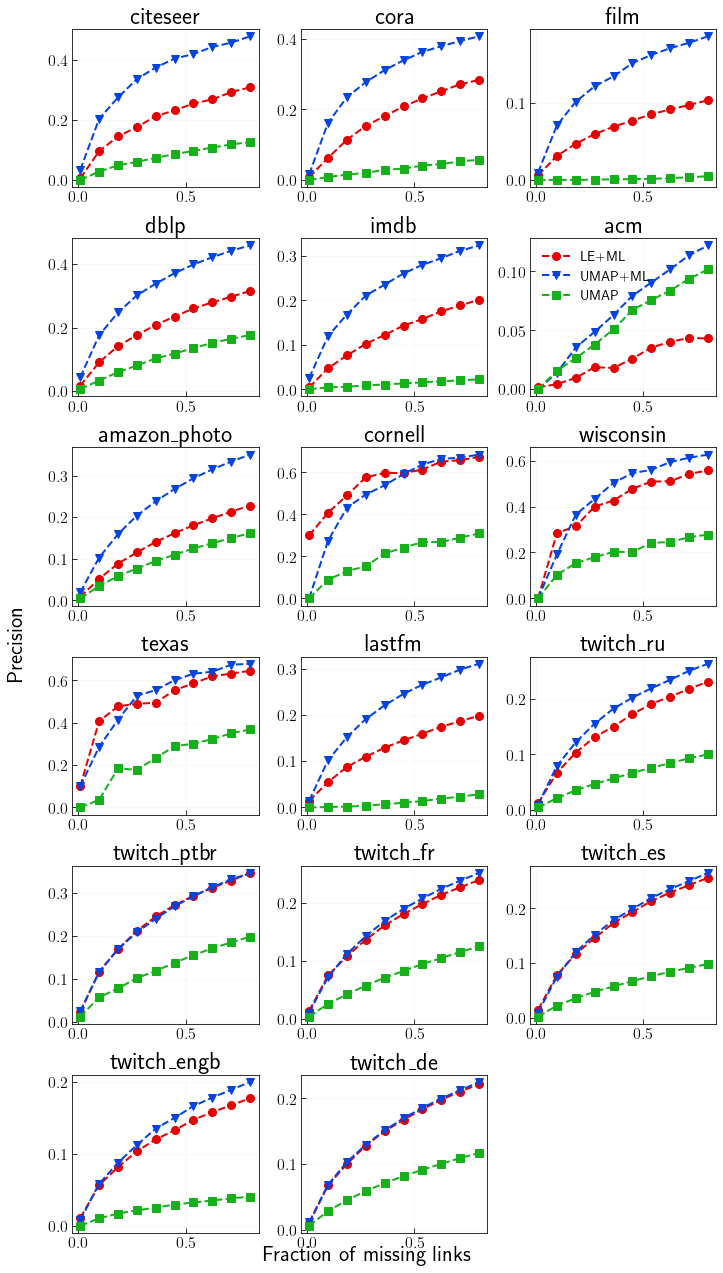

time: 2.37 s (started: 2022-12-22 08:43:53 +01:00)


In [155]:
def plot_precision_curve_per_dataset(qs, le_ml_pr, umap_ml_pr, only_umap_pr, title):
    plt.plot(qs, le_ml_pr, 'o--', label='LE+ML', color='xkcd:red')
    plt.plot(qs, umap_ml_pr, 'v--', label='UMAP+ML', color='xkcd:blue')
    plt.plot(qs, only_umap_pr, 's--', label='UMAP', color='xkcd:green')
    plt.title(title)
    
    
plt.figure(figsize=(10, 18))
plt.subplot(6, 3, 1)
plot_precision_curve_per_dataset(qs, citeseer_le_ml_pr, citeseer_umap_ml_pr, citeseer_only_umap_pr, 'citeseer')
plt.subplot(6, 3, 2)
plot_precision_curve_per_dataset(qs, cora_le_ml_pr, cora_umap_ml_pr, cora_only_umap_pr, 'cora')
plt.subplot(6, 3, 3)
plot_precision_curve_per_dataset(qs, film_le_ml_pr, film_umap_ml_pr, film_only_umap_pr, 'film')
plt.subplot(6, 3, 4)
plot_precision_curve_per_dataset(qs, dblp_le_ml_pr, dblp_umap_ml_pr, dblp_only_umap_pr, 'dblp')
plt.subplot(6, 3, 5)
plot_precision_curve_per_dataset(qs, imdb_le_ml_pr, imdb_umap_ml_pr, imdb_only_umap_pr, 'imdb')
plt.subplot(6, 3, 6)
plot_precision_curve_per_dataset(qs, acm_le_ml_pr, acm_umap_ml_pr, acm_only_umap_pr, 'acm')
plt.legend(fontsize=14)
plt.subplot(6, 3, 7)
plot_precision_curve_per_dataset(qs, amazon_photo_le_ml_pr, amazon_photo_umap_ml_pr, amazon_photo_only_umap_pr, 'amazon_photo')
plt.subplot(6, 3, 8)
plot_precision_curve_per_dataset(qs, cornell_le_ml_pr, cornell_umap_ml_pr, cornell_only_umap_pr, 'cornell')
plt.subplot(6, 3, 9)
plot_precision_curve_per_dataset(qs, wisconsin_le_ml_pr, wisconsin_umap_ml_pr, wisconsin_only_umap_pr, 'wisconsin')
plt.subplot(6, 3, 10)
plot_precision_curve_per_dataset(qs, texas_le_ml_pr, texas_umap_ml_pr, texas_only_umap_pr, 'texas')
plt.subplot(6, 3, 11)
plot_precision_curve_per_dataset(qs, lastfm_le_ml_pr, lastfm_umap_ml_pr, lastfm_only_umap_pr, 'lastfm')
plt.subplot(6, 3, 12)
plot_precision_curve_per_dataset(qs, twitch_ru_le_ml_pr, twitch_ru_umap_ml_pr, twitch_ru_only_umap_pr, 'twitch_ru')
plt.subplot(6, 3, 13)
plot_precision_curve_per_dataset(qs, twitch_ptbr_le_ml_pr, twitch_ptbr_umap_ml_pr, twitch_ptbr_only_umap_pr, 'twitch_ptbr')
plt.subplot(6, 3, 14)
plot_precision_curve_per_dataset(qs, twitch_fr_le_ml_pr, twitch_fr_umap_ml_pr, twitch_fr_only_umap_pr, 'twitch_fr')
plt.subplot(6, 3, 15)
plot_precision_curve_per_dataset(qs, twitch_es_le_ml_pr, twitch_es_umap_ml_pr, twitch_es_only_umap_pr, 'twitch_es')
plt.subplot(6, 3, 16)
plot_precision_curve_per_dataset(qs, twitch_engb_le_ml_pr, twitch_engb_umap_ml_pr, twitch_engb_only_umap_pr, 'twitch_engb')
plt.subplot(6, 3, 17)
plot_precision_curve_per_dataset(qs, twitch_de_le_ml_pr, twitch_de_umap_ml_pr, twitch_de_only_umap_pr, 'twitch_de')


fig = plt.gcf()
fig.supxlabel('Fraction of missing links', fontsize=22, y=0.02)
fig.supylabel('Precision', fontsize=22, x=0)

plt.tight_layout()
# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/Report/homophily-new-datasets-updated-link-prediction-19-12-22/plots/link_prediction_precision_comparison.pdf")

In [152]:
def get_precision_for_missing_link_fraction(qs, le_ml_pr, umap_ml_pr, only_umap_pr, q=0.2):
    idx = np.where(np.isclose(qs, q, rtol=0.08))[0][0]
    return {
        'pr_le_ml': le_ml_pr[idx],
        'pr_umap_ml': umap_ml_pr[idx],
        'pr_only_umap': only_umap_pr[idx]
    }


citeseer_pr = get_precision_for_missing_link_fraction(qs, citeseer_le_ml_pr, citeseer_umap_ml_pr, citeseer_only_umap_pr)
cora_pr = get_precision_for_missing_link_fraction(qs, cora_le_ml_pr, cora_umap_ml_pr, cora_only_umap_pr)
film_pr = get_precision_for_missing_link_fraction(qs, film_le_ml_pr, film_umap_ml_pr, film_only_umap_pr)
dblp_pr = get_precision_for_missing_link_fraction(qs, dblp_le_ml_pr, dblp_umap_ml_pr, dblp_only_umap_pr)
imdb_pr = get_precision_for_missing_link_fraction(qs, imdb_le_ml_pr, imdb_umap_ml_pr, imdb_only_umap_pr)
acm_pr = get_precision_for_missing_link_fraction(qs, acm_le_ml_pr, acm_umap_ml_pr, acm_only_umap_pr)
amazon_photo_pr = get_precision_for_missing_link_fraction(qs, amazon_photo_le_ml_pr, amazon_photo_umap_ml_pr, amazon_photo_only_umap_pr)
cornell_pr = get_precision_for_missing_link_fraction(qs, cornell_le_ml_pr, cornell_umap_ml_pr, cornell_only_umap_pr)
wisconsin_pr = get_precision_for_missing_link_fraction(qs, wisconsin_le_ml_pr, wisconsin_umap_ml_pr, wisconsin_only_umap_pr)
texas_pr = get_precision_for_missing_link_fraction(qs, texas_le_ml_pr, texas_umap_ml_pr, texas_only_umap_pr)
lastfm_pr = get_precision_for_missing_link_fraction(qs, lastfm_le_ml_pr, lastfm_umap_ml_pr, lastfm_only_umap_pr)
twitch_ru_pr = get_precision_for_missing_link_fraction(qs, twitch_ru_le_ml_pr, twitch_ru_umap_ml_pr, twitch_ru_only_umap_pr)
twitch_ptbr_pr = get_precision_for_missing_link_fraction(qs, twitch_ptbr_le_ml_pr, twitch_ptbr_umap_ml_pr, twitch_ptbr_only_umap_pr)
twitch_fr_pr = get_precision_for_missing_link_fraction(qs, twitch_fr_le_ml_pr, twitch_fr_umap_ml_pr, twitch_fr_only_umap_pr)
twitch_es_pr = get_precision_for_missing_link_fraction(qs, twitch_es_le_ml_pr, twitch_es_umap_ml_pr, twitch_es_only_umap_pr)
twitch_engb_pr = get_precision_for_missing_link_fraction(qs, twitch_engb_le_ml_pr, twitch_engb_umap_ml_pr, twitch_engb_only_umap_pr)
twitch_de_pr = get_precision_for_missing_link_fraction(qs, twitch_de_le_ml_pr, twitch_de_umap_ml_pr, twitch_de_only_umap_pr)

time: 2.09 ms (started: 2022-12-21 21:48:24 +01:00)


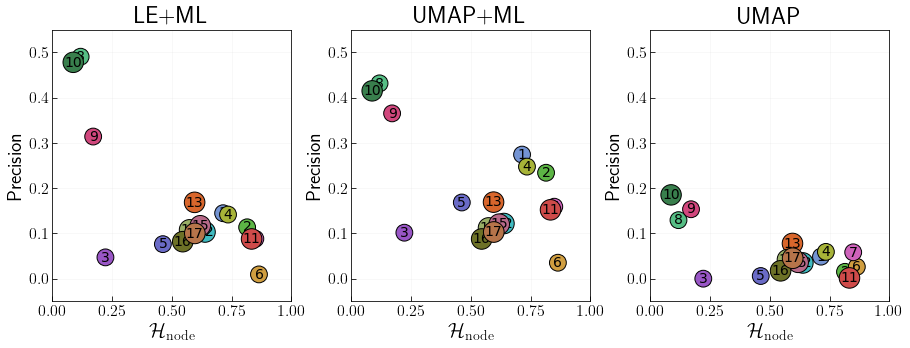

time: 639 ms (started: 2022-12-22 08:44:17 +01:00)


In [156]:
pr_le_ml = np.array([
    citeseer_pr['pr_le_ml'],
    cora_pr['pr_le_ml'],
    film_pr['pr_le_ml'],
    dblp_pr['pr_le_ml'],
    imdb_pr['pr_le_ml'],
    acm_pr['pr_le_ml'],
    amazon_photo_pr['pr_le_ml'],
    cornell_pr['pr_le_ml'],
    wisconsin_pr['pr_le_ml'],
    texas_pr['pr_le_ml'],
    lastfm_pr['pr_le_ml'],
    twitch_ru_pr['pr_le_ml'],
    twitch_ptbr_pr['pr_le_ml'],
    twitch_fr_pr['pr_le_ml'],
    twitch_es_pr['pr_le_ml'],
    twitch_engb_pr['pr_le_ml'],
    twitch_de_pr['pr_le_ml']
])

pr_umap_ml = np.array([
    citeseer_pr['pr_umap_ml'],
    cora_pr['pr_umap_ml'],
    film_pr['pr_umap_ml'],
    dblp_pr['pr_umap_ml'],
    imdb_pr['pr_umap_ml'],
    acm_pr['pr_umap_ml'],
    amazon_photo_pr['pr_umap_ml'],
    cornell_pr['pr_umap_ml'],
    wisconsin_pr['pr_umap_ml'],
    texas_pr['pr_umap_ml'],
    lastfm_pr['pr_umap_ml'],
    twitch_ru_pr['pr_umap_ml'],
    twitch_ptbr_pr['pr_umap_ml'],
    twitch_fr_pr['pr_umap_ml'],
    twitch_es_pr['pr_umap_ml'],
    twitch_engb_pr['pr_umap_ml'],
    twitch_de_pr['pr_umap_ml']
])

pr_only_umap = np.array([
    citeseer_pr['pr_only_umap'],
    cora_pr['pr_only_umap'],
    film_pr['pr_only_umap'],
    dblp_pr['pr_only_umap'],
    imdb_pr['pr_only_umap'],
    acm_pr['pr_only_umap'],
    amazon_photo_pr['pr_only_umap'],
    cornell_pr['pr_only_umap'],
    wisconsin_pr['pr_only_umap'],
    texas_pr['pr_only_umap'],
    lastfm_pr['pr_only_umap'],
    twitch_ru_pr['pr_only_umap'],
    twitch_ptbr_pr['pr_only_umap'],
    twitch_fr_pr['pr_only_umap'],
    twitch_es_pr['pr_only_umap'],
    twitch_engb_pr['pr_only_umap'],
    twitch_de_pr['pr_only_umap']
])



def plot_pr_per_option(pr_res, col):
    datasets = list(range(1, 18))
    for gr, h, c, name in zip(pr_res, df_all[col], colors, datasets):
        plt.text(h, gr, name, ha="center", va="center",
                 bbox = dict(boxstyle=f"circle,pad=0.1", fc=c), fontsize=14, usetex=False)
    plt.ylim(-0.05, 0.55)
    plt.ylabel('Precision')

plt.figure(figsize=(15, 5))
plt.subplots_adjust(wspace=0.25)
plt.subplot(1, 3, 1)
plot_pr_per_option(pr_le_ml, 'H_node')
plt.xlabel(r'$\mathcal{H}_{\mathrm{node}}$')    
plt.title('LE+ML')

plt.subplot(1, 3, 2)
plot_pr_per_option(pr_umap_ml, 'H_node')
plt.xlabel(r'$\mathcal{H}_{\mathrm{node}}$')
plt.title('UMAP+ML')

plt.subplot(1, 3, 3)
plot_pr_per_option(pr_only_umap, 'H_node')
plt.xlabel(r'$\mathcal{H}_{\mathrm{node}}$')
plt.title('UMAP')


# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/Report/homophily-new-datasets-updated-link-prediction-19-12-22/plots/link_prediction_precision_vs_homophily.pdf")

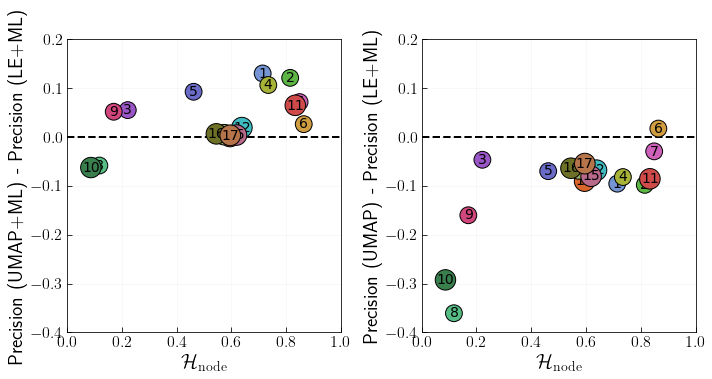

time: 455 ms (started: 2022-12-22 08:44:32 +01:00)


In [157]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plot_pr_per_option(pr_umap_ml - pr_le_ml, 'H_node')
plt.axhline(y=0, color='black', linestyle='--')
plt.ylim(-0.4, 0.2)
plt.xlabel(r'$\mathcal{H}_{\mathrm{node}}$')
plt.ylabel(r'Precision (UMAP+ML) - Precision (LE+ML)')

plt.subplot(1, 2, 2)
plot_pr_per_option(pr_only_umap - pr_le_ml, 'H_node')
plt.axhline(y=0, color='black', linestyle='--')
plt.ylim(-0.4, 0.2)
plt.xlabel(r'$\mathcal{H}_{\mathrm{node}}$')
plt.ylabel(r'Precision (UMAP) - Precision (LE+ML)')

plt.tight_layout()

# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/Report/homophily-new-datasets-updated-link-prediction-19-12-22/plots/link_prediction_precision_vs_homophily_difference.pdf")